## **$$        RED\ Wine\ Dataset$$**

## **1.   Data Preparation**

##### **Step.01 -    `Importig Libraries and Reading the Dataset` :-**

In [1]:
# Importing Libraries 
import pandas as pd
import re
import calendar
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import io
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder


# Read the Dataset using pandas
RED_WINE_Dataset =  pd.read_csv("RED_WINE.csv")
# Display frist 5 data of the dataset as a sample 
display(RED_WINE_Dataset.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


##### **Step.02 -    `Cleaning Dataset` :-**

-    **Checking `Shape`, `Missing Value`, `Duplicates Value`, Segrregate `Numerical Features` or `Categorical Features`, `Summary` and `Descriptive Summary` of Dataset :**

In [2]:
## Check Shape
RED_WINE_dataset_shape = RED_WINE_Dataset.shape
print(f"Shape (Rows, Column) :- {RED_WINE_dataset_shape}")


## Check Missing Value
# Columns which has null values
RED_WINE_dataset_missing_value = RED_WINE_Dataset.isnull().sum()
print("\nMissing Values (Column wise) :-")
display(RED_WINE_dataset_missing_value)


## Check Duplicates
RED_WINE_dataset_duplicates = RED_WINE_Dataset.duplicated().sum()
print(f"\nNumber of duplicates :- {RED_WINE_dataset_duplicates}")


## Segrregate Numerical and Categorical features
RED_WINE_numerical_features=[feature for feature in RED_WINE_Dataset.columns if RED_WINE_Dataset[feature].dtype!='O']
RED_WINE_categorical_feature=[feature for feature in RED_WINE_Dataset.columns if RED_WINE_Dataset[feature].dtype=='O']
print(f"\nNumerical Features: {RED_WINE_numerical_features}")
print(f"\nCategorical Feature: {RED_WINE_categorical_feature}")


## Check Summary
# Capture the output of df.info() as a string
RED_WINE_summary_buffer = io.StringIO()
RED_WINE_Dataset.info(buf=RED_WINE_summary_buffer)
RED_WINE_dataset_summary_str = RED_WINE_summary_buffer.getvalue()
# Close the buffer
RED_WINE_summary_buffer.close()
# Now, output_str contains the info() output as a string
print("\nSummary :-")
print(RED_WINE_dataset_summary_str)


## Check Descriptive Summary
RED_WINE_dataset_descriptive_summary =RED_WINE_Dataset.describe().T
print("\nDescriptive Statistics:-")
display(RED_WINE_dataset_descriptive_summary)


## Check Mis-Spaced
RED_WINE_mis_spaced_columns = [col for col in RED_WINE_Dataset.columns if ' ' in col]

if RED_WINE_mis_spaced_columns:
    print("\nMis-spaced column names :-")
    for col in RED_WINE_mis_spaced_columns:
        print(f"'{col}'")
else:
    print("\nNo mis-spaced column names found.")


## Check No. of Unique Value
print("\nTotal No. of Unique Value for each Columns :-")
for col_name in RED_WINE_Dataset.columns:
    RED_WINE_No_unique_value = len(RED_WINE_Dataset[col_name].unique())
    print(F"{col_name} = {RED_WINE_No_unique_value}")

Shape (Rows, Column) :- (1599, 12)

Missing Values (Column wise) :-


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Number of duplicates :- 240

Numerical Features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

Categorical Feature: []

Summary :-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcoho

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000



Mis-spaced column names :-
'fixed acidity'
'volatile acidity'
'citric acid'
'residual sugar'
'free sulfur dioxide'
'total sulfur dioxide'

Total No. of Unique Value for each Columns :-
fixed acidity = 96
volatile acidity = 143
citric acid = 80
residual sugar = 91
chlorides = 153
free sulfur dioxide = 60
total sulfur dioxide = 144
density = 436
pH = 89
sulphates = 96
alcohol = 65
quality = 6


-  **Remove `Duplicates records` of the Dataset :**

In [3]:
RED_WINE_Dataset.drop_duplicates(inplace=True)

## **2.   Exploratory Data Analysis (EDA)**

##### **Step.01 -    `EDA - Visualizations Based on Target Features` :-**

-   **`Histplot` of the Dataset -**

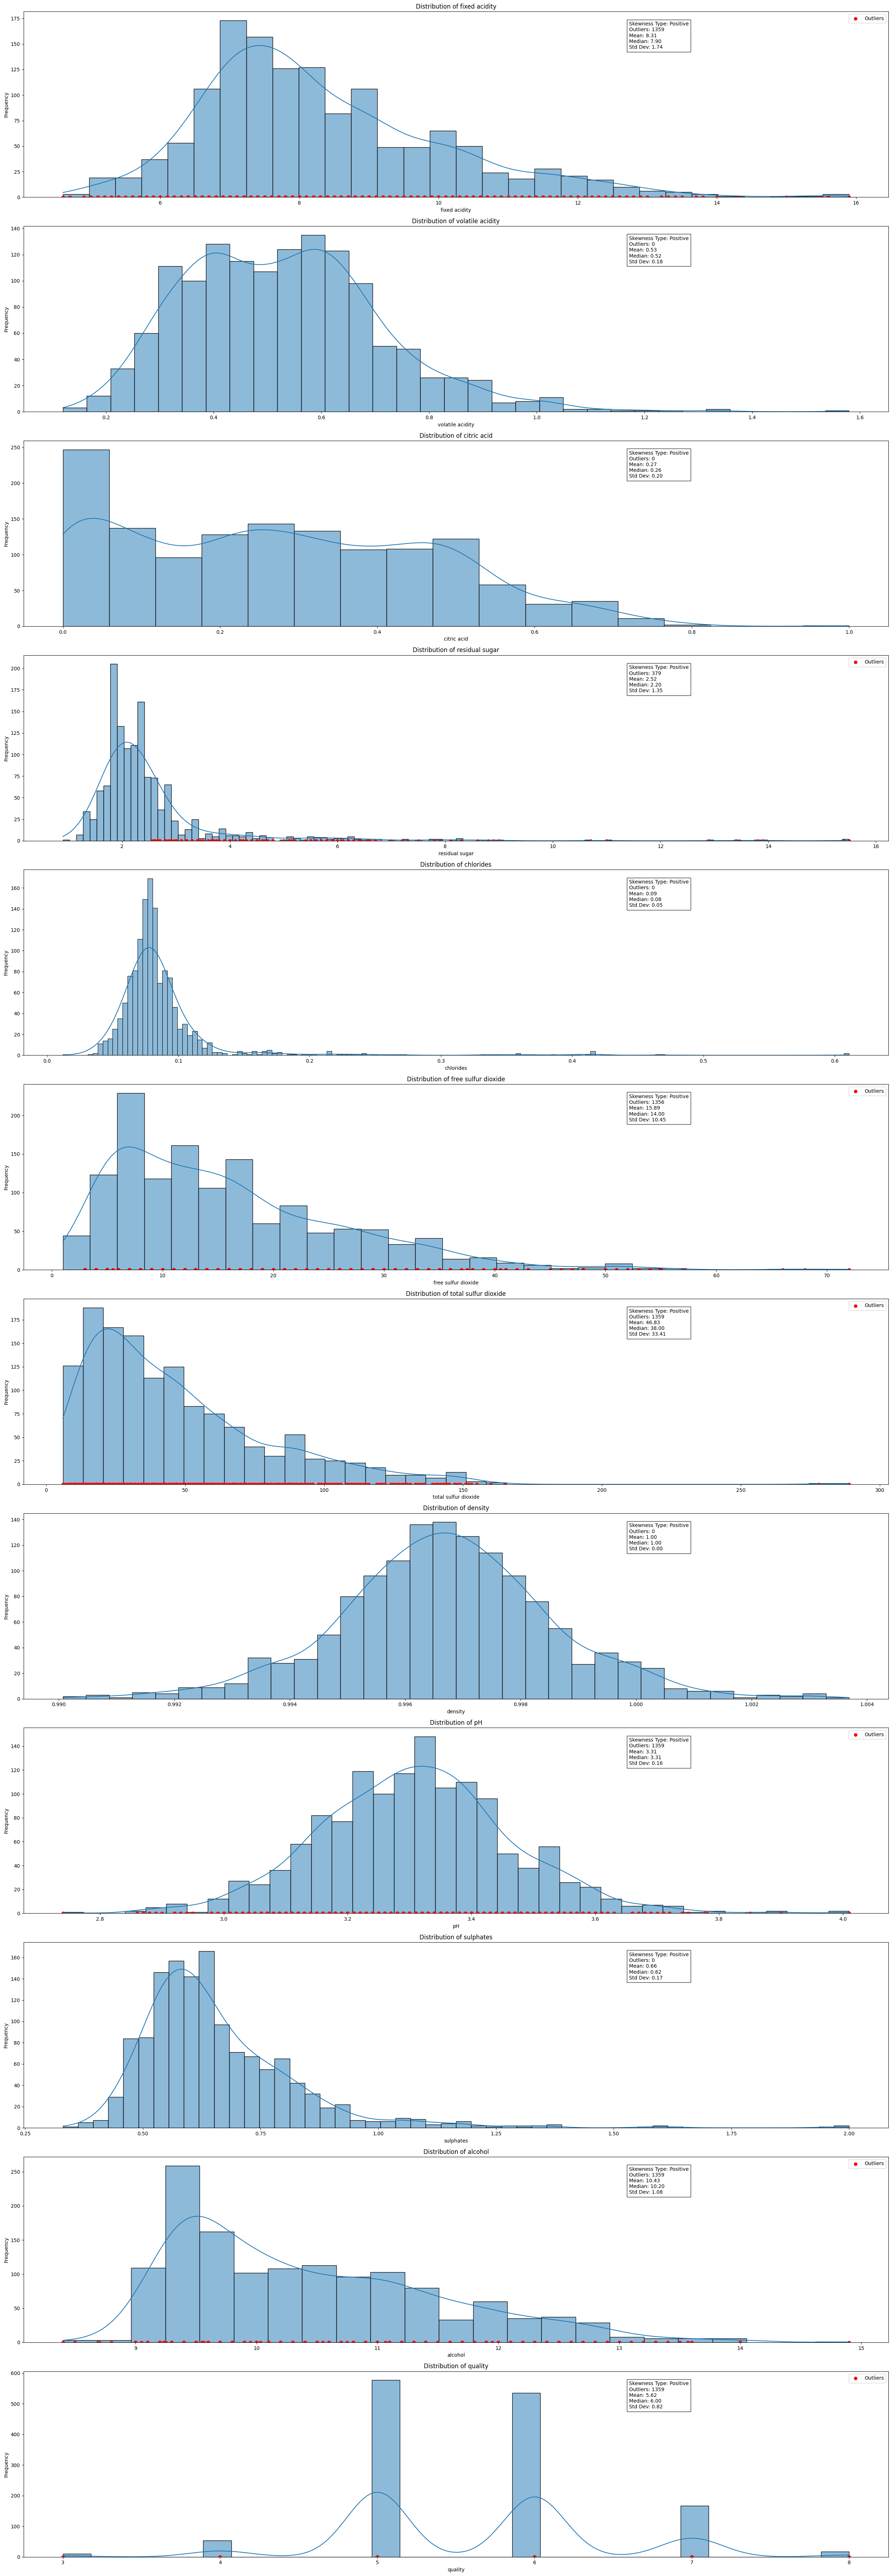

In [4]:
# Calculate the number of rows for subplots
num_rows = len(RED_WINE_numerical_features)
num_cols = 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 72))
axes = axes.flatten()

# EDA - Visualizations
for i, hist_col in enumerate(RED_WINE_numerical_features):
    ax = axes[i]
    
    # Plot the histogram with kernel density estimate (KDE)
    sns.histplot(RED_WINE_Dataset, x=hist_col, kde=True, ax=ax)
    
    ax.set_xlabel(hist_col)  # Set the x-axis label as the column name
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {hist_col}')
    
    # Calculate skewness
    skewness = RED_WINE_Dataset[hist_col].skew()
    
    # Identify outliers (you can adjust the threshold as needed)
    threshold = 2.5  # Adjust this threshold based on your data
    outliers = RED_WINE_Dataset[RED_WINE_Dataset[hist_col] > threshold]
    
    # Determine skewness type
    skewness_type = "Positive" if skewness > 0 else "Negative" if skewness < 0 else "No Skew"

    
    # Summarize data (mean, median, etc.)
    mean = RED_WINE_Dataset[hist_col].mean()
    median = RED_WINE_Dataset[hist_col].median()
    std_dev = RED_WINE_Dataset[hist_col].std()


    # Display skewness type and number of outliers as a legend
    legend_text = f"Skewness Type: {skewness_type}\nOutliers: {len(outliers)}\nMean: {mean:.2f}\nMedian: {median:.2f}\nStd Dev: {std_dev:.2f}"
    
    ax.text(0.7, 0.8, legend_text,
            transform=ax.transAxes,
            bbox=dict(facecolor='white', alpha=0.8))
    
    # Highlight outliers with red markers on the plot
    if not outliers.empty:
        ax.scatter(outliers[hist_col], np.zeros(len(outliers)), color='red', marker='o', label='Outliers')
        ax.legend()

plt.tight_layout()  # Ensures subplots do not overlap
plt.show()

## **3.   Correlation Analysis**

##### **Step.02 -    `Visualize the correlations using a heatmap` :-**

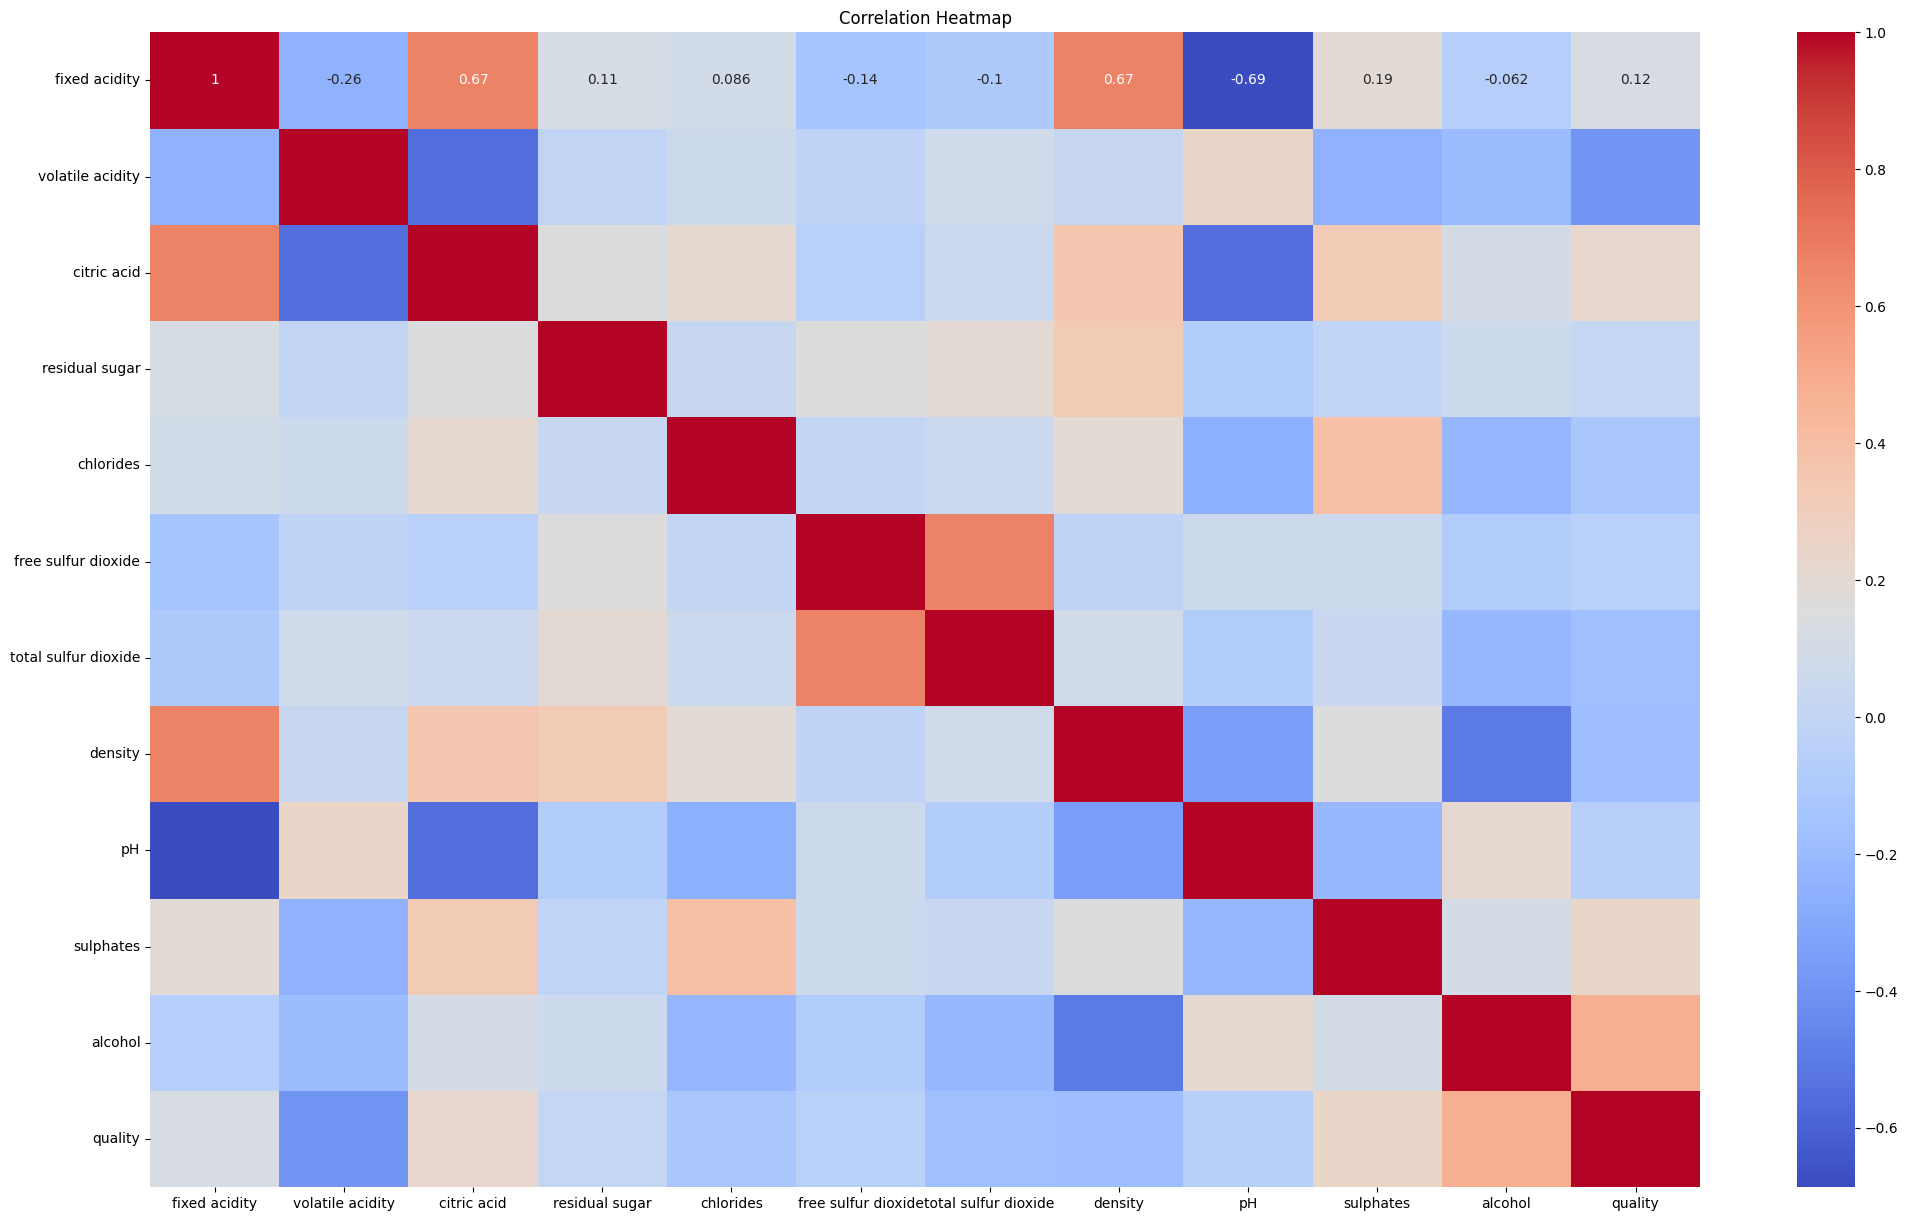

In [5]:
# Correlation Analysis
plt.figure(figsize=(25,15))
correlation_matrix = RED_WINE_Dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## **4.   Hypothesis Testing**

In [6]:
# Hypothesis Testing (ANOVA as an example)
for col in RED_WINE_numerical_features:
    group_data = []
    for group in RED_WINE_Dataset[col].unique():
        group_data.append(RED_WINE_Dataset['quality'][RED_WINE_Dataset[col] == group])
    f_statistic, p_value = stats.f_oneway(*group_data)
    print(f'ANOVA for {col}: \n\tF-statistic = {f_statistic:.2f}\n\tp-value = {p_value:.4f}')

ANOVA for fixed acidity: 
	F-statistic = 1.56
	p-value = 0.0007
ANOVA for volatile acidity: 
	F-statistic = 2.82
	p-value = 0.0000
ANOVA for citric acid: 
	F-statistic = 2.65
	p-value = 0.0000
ANOVA for residual sugar: 
	F-statistic = 1.73
	p-value = 0.0001
ANOVA for chlorides: 
	F-statistic = 1.54
	p-value = 0.0001
ANOVA for free sulfur dioxide: 
	F-statistic = 0.85
	p-value = 0.7754
ANOVA for total sulfur dioxide: 
	F-statistic = 1.29
	p-value = 0.0175
ANOVA for density: 
	F-statistic = 1.26
	p-value = 0.0018
ANOVA for pH: 
	F-statistic = 1.27
	p-value = 0.0510
ANOVA for sulphates: 
	F-statistic = 4.13
	p-value = 0.0000
ANOVA for alcohol: 
	F-statistic = 8.03
	p-value = 0.0000
ANOVA for quality: 
	F-statistic = inf
	p-value = 0.0000


    ####################################################################################################################

## **$$        Student\ Performance\ Dataset$$**

## **1.   Data Preparation**

##### **Step.01 -    `Importig Libraries and Reading the Dataset` :-**

In [7]:
# Importing Libraries 
import pandas as pd
import re
import calendar
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import io
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder


# Read the Dataset using pandas
Student_Performance_Dataset =  pd.read_csv("StudentsPerformance.csv")
# Display frist 5 data of the dataset as a sample 
display(Student_Performance_Dataset.head())

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##### **Step.02 -    `Cleaning Dataset` :-**

-    **Checking `Shape`, `Missing Value`, `Duplicates Value`, Segrregate `Numerical Features` or `Categorical Features`, `Summary` and `Descriptive Summary` of Dataset :**

In [8]:
## Check Shape
Student_Performance_dataset_shape = Student_Performance_Dataset.shape
print(f"Shape (Rows, Column) :- {Student_Performance_dataset_shape}")


## Check Missing Value
# Columns which has null values
Student_Performance_dataset_missing_value = Student_Performance_Dataset.isnull().sum()
print("\nMissing Values (Column wise) :-")
display(Student_Performance_dataset_missing_value)


## Check Duplicates
Student_Performance_dataset_duplicates = Student_Performance_Dataset.duplicated().sum()
print(f"\nNumber of duplicates :- {Student_Performance_dataset_duplicates}")


## Segrregate Numerical and Categorical features
Student_Performance_numerical_features=[feature for feature in Student_Performance_Dataset.columns if Student_Performance_Dataset[feature].dtype!='O']
Student_Performance_categorical_feature=[feature for feature in Student_Performance_Dataset.columns if Student_Performance_Dataset[feature].dtype=='O']
print(f"\nNumerical Features: {Student_Performance_numerical_features}")
print(f"\nCategorical Feature: {Student_Performance_categorical_feature}")


## Check Summary
# Capture the output of df.info() as a string
Student_Performance_summary_buffer = io.StringIO()
Student_Performance_Dataset.info(buf=Student_Performance_summary_buffer)
Student_Performance_dataset_summary_str = Student_Performance_summary_buffer.getvalue()
# Close the buffer
Student_Performance_summary_buffer.close()
# Now, output_str contains the info() output as a string
print("\nSummary :-")
print(Student_Performance_dataset_summary_str)


## Check Descriptive Summary
Student_Performance_dataset_descriptive_summary =Student_Performance_Dataset.describe().T
print("\nDescriptive Statistics:-")
display(Student_Performance_dataset_descriptive_summary)


## Check Mis-Spaced
Student_Performance_mis_spaced_columns = [col for col in Student_Performance_Dataset.columns if ' ' in col]

if Student_Performance_mis_spaced_columns:
    print("\nMis-spaced column names :-")
    for col in Student_Performance_mis_spaced_columns:
        print(f"'{col}'")
else:
    print("\nNo mis-spaced column names found.")


## Check No. of Unique Value
print("\nTotal No. of Unique Value for each Columns :-")
for col_name in Student_Performance_Dataset.columns:
    Student_Performance_No_unique_value = len(Student_Performance_Dataset[col_name].unique())
    print(F"{col_name} = {Student_Performance_No_unique_value}")
    
    
## Check the Outliers
# Define a function to find outliers using the Z-score method
def find_outliers_zscore(Student_Performance_Dataset, threshold=3):
    outliers = {}
    for column in Student_Performance_Dataset.select_dtypes(include=[np.number]):
        z_scores = np.abs(stats.zscore(Student_Performance_Dataset[column]))
        outliers[column] = Student_Performance_Dataset[z_scores > threshold]
    return outliers

# Specify the Z-score threshold (default is 3)
z_score_threshold = 3

# Find outliers in the dataset
outliers = find_outliers_zscore(Student_Performance_Dataset, z_score_threshold)

# Initialize an empty DataFrame to store the outliers
Student_Performance_outliers = pd.DataFrame()

# Add outliers for each numeric feature to the DataFrame
for column, outlier_data in outliers.items():
    Student_Performance_outliers[column] = outlier_data[column].tolist()

# Display the DataFrame with all outlier columns
print("\nOutliers :-")
display(Student_Performance_outliers)


Shape (Rows, Column) :- (1000, 8)

Missing Values (Column wise) :-


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


Number of duplicates :- 0

Numerical Features: ['math score', 'reading score', 'writing score']

Categorical Feature: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

Summary :-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Descriptive Statistics:-


,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0



Mis-spaced column names :-
'parental level of education'
'test preparation course'
'math score'
'reading score'
'writing score'

Total No. of Unique Value for each Columns :-
gender = 2
race/ethnicity = 5
parental level of education = 6
lunch = 2
test preparation course = 2
math score = 81
reading score = 72
writing score = 77

Outliers :-


,math score,reading score,writing score
0,18,17,10
1,0,23,22
2,19,24,19
3,8,24,15


-  **Add `Total Score Column` and `Average Column` :**

In [50]:
Student_Performance_Dataset['total_score'] = (Student_Performance_Dataset['math score'] + Student_Performance_Dataset['reading score']+Student_Performance_Dataset['writing score'])
Student_Performance_Dataset['average'] = Student_Performance_Dataset['total_score']/3

display(Student_Performance_Dataset.head(2))

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


#### **Insights :-**

-   Model Performance

      - Mean Squared Error (`MSE`) - The MSE measures the average squared difference between the actual wine quality ratings and the predicted ratings. In this case, an MSE of approximately 0.43 indicates that, on average, the model's predictions are off by 0.43 quality rating points.

      - Mean Absolute Error (`MAE`) - The MAE represents the average absolute difference between actual and predicted ratings. An MAE of about 0.50 means that, on average, the model's predictions are off by 0.50 quality rating points.

      - R-squared (`R2`) Score - The R2 score measures the proportion of the variance in the target variable (wine quality) that is explained by the model. An R2 score of roughly 0.39 indicates that the model explains 39% of the variance in wine quality, which suggests room for improvement.

-   Feature Importance

      - The feature importance values represent the coefficients assigned to each feature by the linear regression model. These coefficients indicate the direction and magnitude of the impact of each feature on wine quality.

      - Features with positive coefficients (e.g., density, sulphates, alcohol) positively contribute to wine quality.`For example, an increase in alcohol content tends to improve wine quality`.

      - Features with negative coefficients (e.g., volatile acidity, chlorides) have a negative impact on wine quality.`High levels of volatile acidity and chlorides are associated with lower-quality wine`.
      
      - Some features, such as "free sulfur dioxide" and "total sulfur dioxide," have coefficients close to zero, suggesting they have a limited influence on wine quality in this model.

#### **Interpretation :-**

   - `Based on the coefficients`, we can inform that reducing volatile acidity, chlorides, and pH while increasing density, sulphates, and alcohol content may lead to higher-quality wine, according to this linear regression model.

   - It's important to note that these insights are based on a simple linear regression model and may not capture complex interactions between features.

#### **Model Limitations :-**

   - The relatively low R-squared score suggests that the linear regression model may not fully capture the complexities of wine quality prediction. More sophisticated machine learning models, such as random forests or gradient boosting, may yield better results.

   - Feature engineering and additional data preprocessing techniques could further enhance the model's performance.

#### **Practical Implications :-**

   - Winemakers and vineyards can use this model to gain insights into which chemical and physical attributes of wine have the most significant impact on quality. They can adjust their wine production processes to optimize these attributes.

   - The model can also be used for quality control, helping identify potential issues in the production process.

##### **Step.03 -    `Encode Categorical Features` :-**

To encode categorical features like 'gender,' 'race/ethnicity,' 'parental level of education,' 'lunch,' and 'test preparation course'. We can use various techniques like one-hot encoding or label encoding, depending on the nature of the data and the machine learning algorithm you plan to use. Here's how you can encode these features:

1. **Gender (Binary)**
2. **Race/Ethnicity (Nominal)**
3. **Parental Level of Education (Ordinal)**
4. **Lunch (Binary)**
5. **Test Preparation Course (Binary)**

In [51]:
# Encode categorical features (example using one-hot encoding)
Student_Performance_data_encoded = pd.get_dummies(Student_Performance_Dataset, columns=Student_Performance_categorical_feature)

## **2.   Exploratory Data Analysis (EDA)**

##### **Step.01 -    `Summary statistics` :-**

In [52]:
# EDA - Summary statistics
display(Student_Performance_Dataset.describe().T)

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089000,15.163080,0.0,57.000000,66.000000,77.000000,100.0
reading score,1000.0,69.169000,14.600192,17.0,59.000000,70.000000,79.000000,100.0
writing score,1000.0,68.054000,15.195657,10.0,57.750000,69.000000,79.000000,100.0
total_score,1000.0,203.312000,42.771978,27.0,175.000000,205.000000,233.000000,300.0
average,1000.0,67.770667,14.257326,9.0,58.333333,68.333333,77.666667,100.0


##### **Step.02 -    `EDA - Visualizations Based on Target Features` :-**

-   **`Histplot` for Numerical Features of the Dataset -**

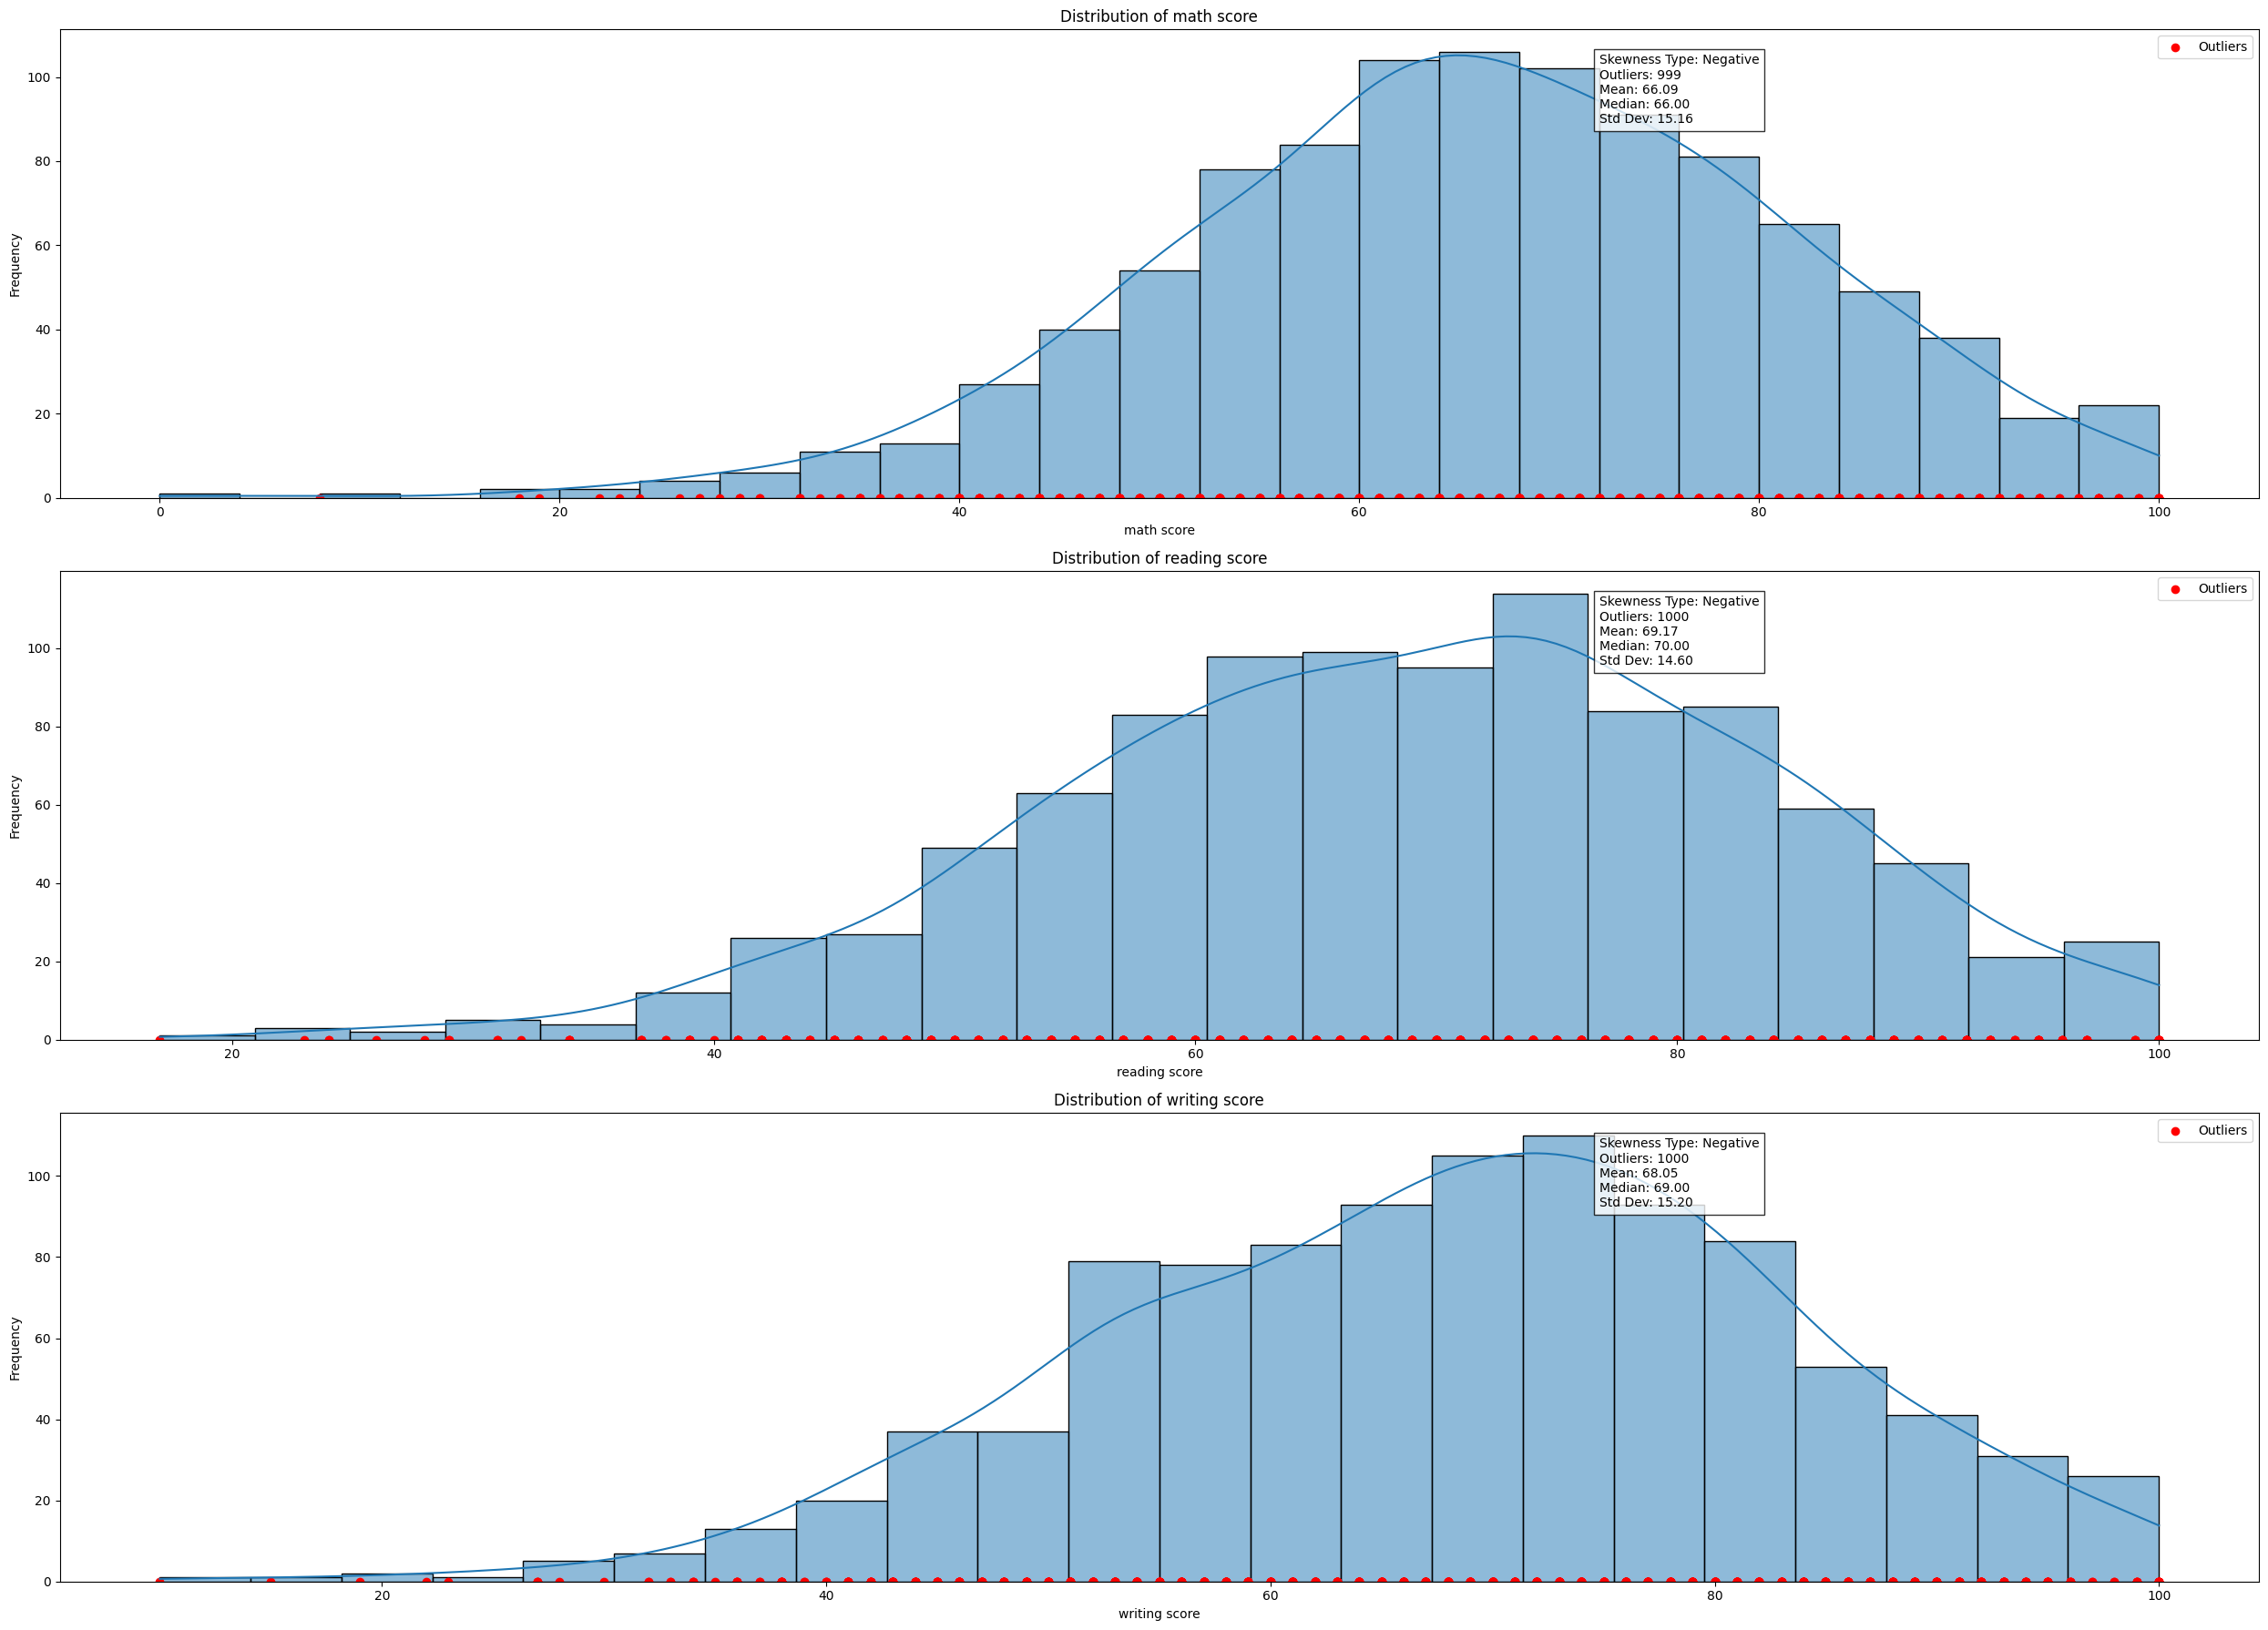

In [53]:
# Calculate the number of rows for subplots
num_rows = len(Student_Performance_numerical_features)
num_cols = 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 18))
axes = axes.flatten()

# EDA - Visualizations
for i, hist_col in enumerate(Student_Performance_numerical_features):
    ax = axes[i]
    
    # Plot the histogram with kernel density estimate (KDE)
    sns.histplot(Student_Performance_Dataset, x=hist_col, kde=True, ax=ax)
    
    ax.set_xlabel(hist_col)  # Set the x-axis label as the column name
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {hist_col}')
    
    # Calculate skewness
    skewness = Student_Performance_Dataset[hist_col].skew()
    
    # Identify outliers (you can adjust the threshold as needed)
    threshold = 2.5  # Adjust this threshold based on your data
    outliers = Student_Performance_Dataset[Student_Performance_Dataset[hist_col] > threshold]
    
    # Determine skewness type
    skewness_type = "Positive" if skewness > 0 else "Negative" if skewness < 0 else "No Skew"

    
    # Summarize data (mean, median, etc.)
    mean = Student_Performance_Dataset[hist_col].mean()
    median = Student_Performance_Dataset[hist_col].median()
    std_dev = Student_Performance_Dataset[hist_col].std()


    # Display skewness type and number of outliers as a legend
    legend_text = f"Skewness Type: {skewness_type}\nOutliers: {len(outliers)}\nMean: {mean:.2f}\nMedian: {median:.2f}\nStd Dev: {std_dev:.2f}"
    
    ax.text(0.7, 0.8, legend_text,
            transform=ax.transAxes,
            bbox=dict(facecolor='white', alpha=0.8))
    
    # Highlight outliers with red markers on the plot
    if not outliers.empty:
        ax.scatter(outliers[hist_col], np.zeros(len(outliers)), color='red', marker='o', label='Outliers')
        ax.legend()

plt.tight_layout()  # Ensures subplots do not overlap
plt.show()

-   **`Boxplot` for Calegorical Features of the Dataset -**

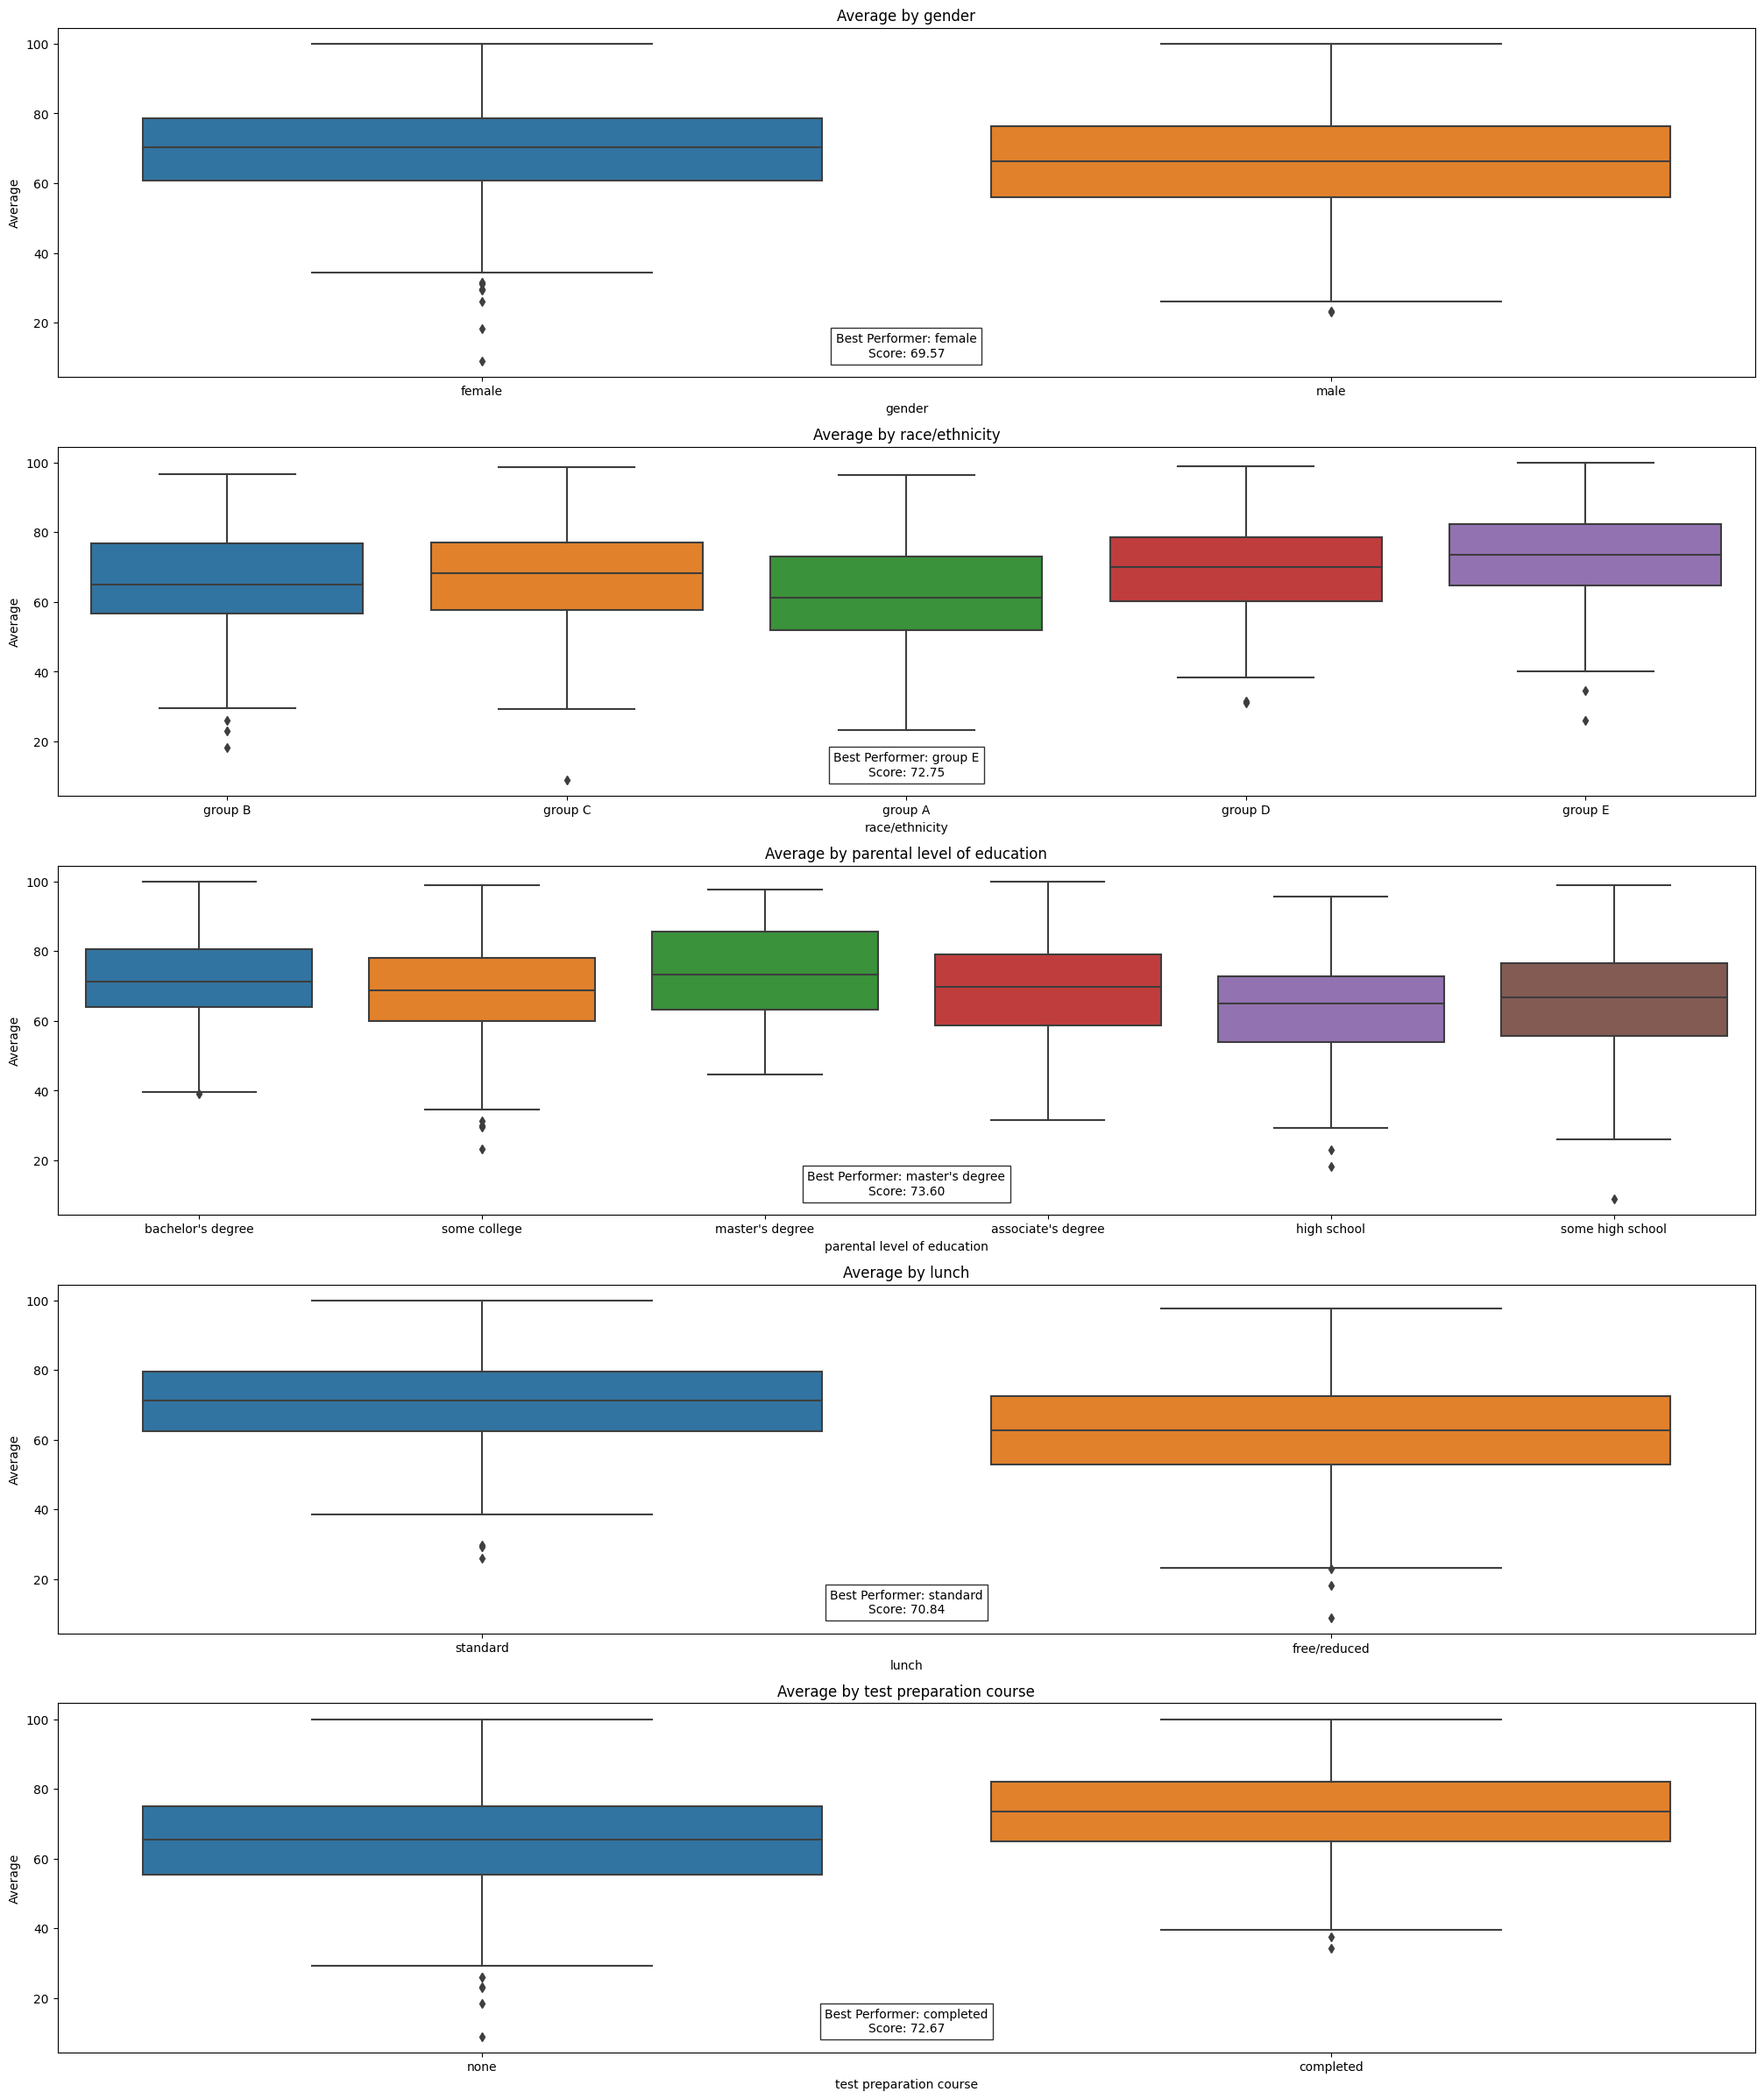

In [54]:
num_rows = len(Student_Performance_categorical_feature)
num_cols = 1
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 30))
axes = axes.flatten()

# EDA - Visualizations
for i, hist_col in enumerate(Student_Performance_categorical_feature):

    # Calculate the mean 'average' score for each gender group
    average_by_group = Student_Performance_Dataset.groupby(hist_col)['average'].mean()

    # Find the best performer (highest mean 'average' score)
    best_performer = average_by_group.idxmax()
    best_performer_score = average_by_group.max()


    ax = axes[i]
    sns.boxplot(x=hist_col, y='average', data=Student_Performance_Dataset, ax=ax)
    ax.set_xlabel(hist_col)  # Set the x-axis label as the column name
    ax.set_ylabel('Average')
    ax.set_title(f'Average by {hist_col}')
        
    # Annotate the plot with the best performer and their score
    ax.text(0.5, 0.05, f"Best Performer: {best_performer}\nScore: {best_performer_score:.2f}",
            transform=ax.transAxes,
            ha='center',
            va='bottom',
            bbox=dict(facecolor='white', alpha=0.8))

plt.show()

##### **Step.03 -    `Explore relationships between categorical features and Subject scores using groupby and aggregation operations.` :-**

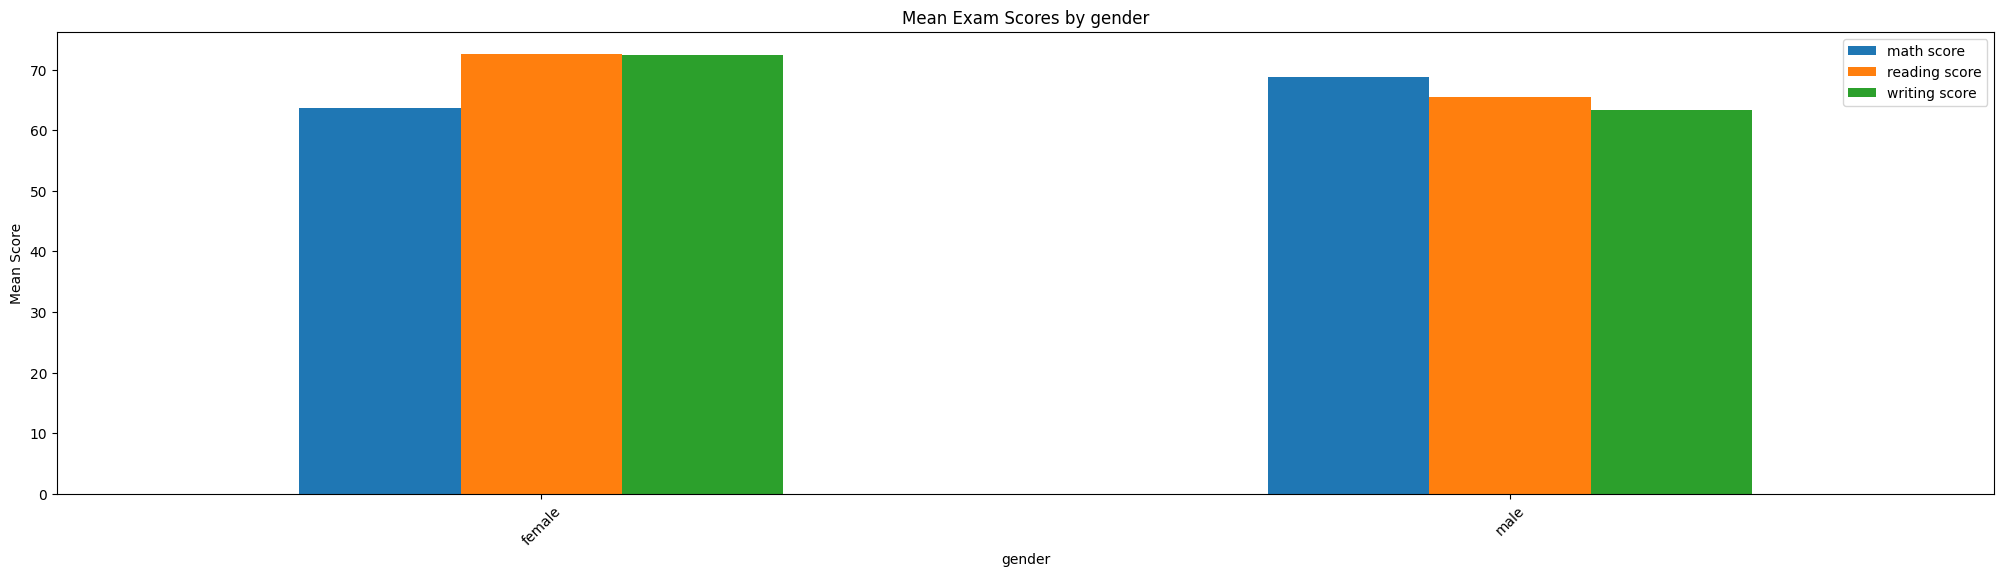

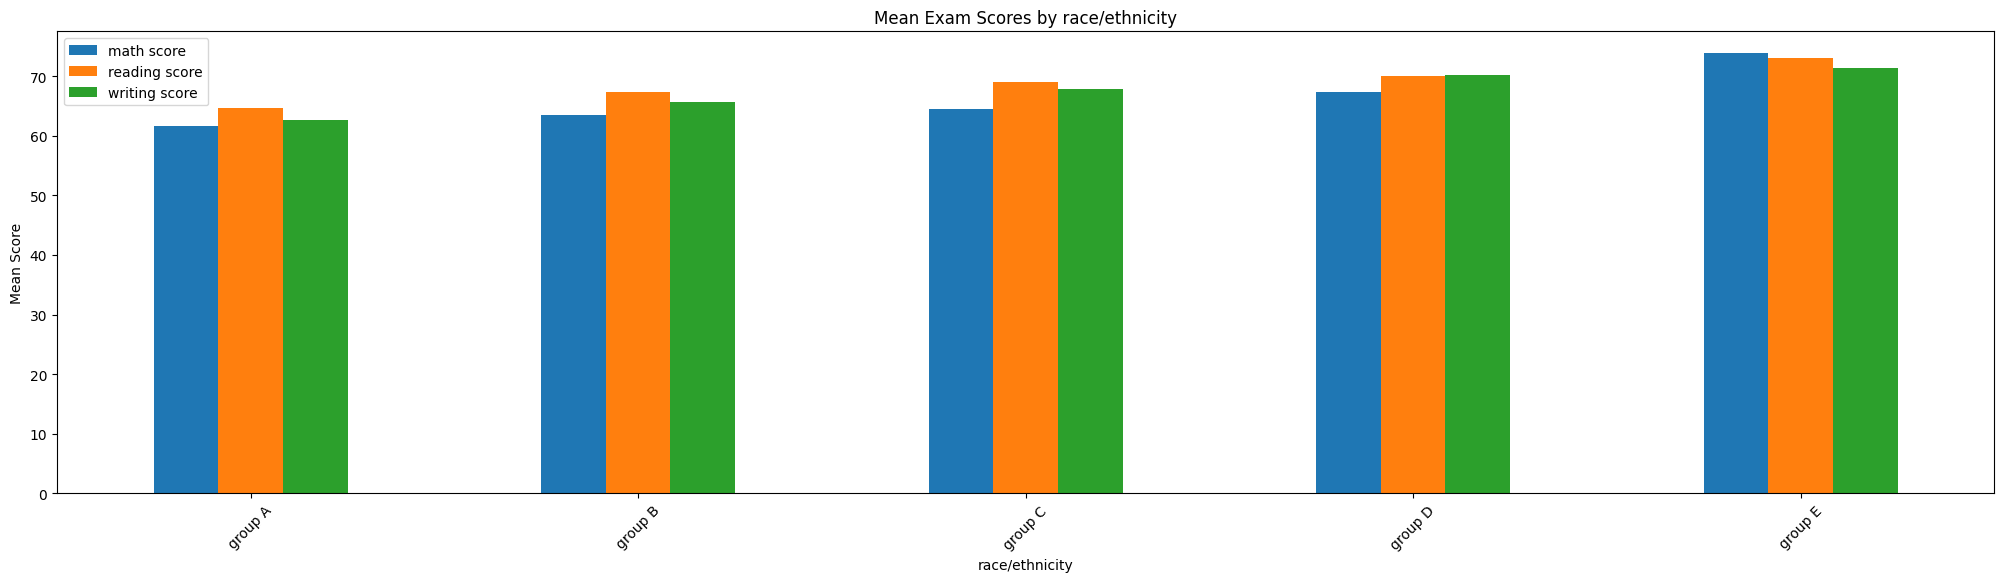

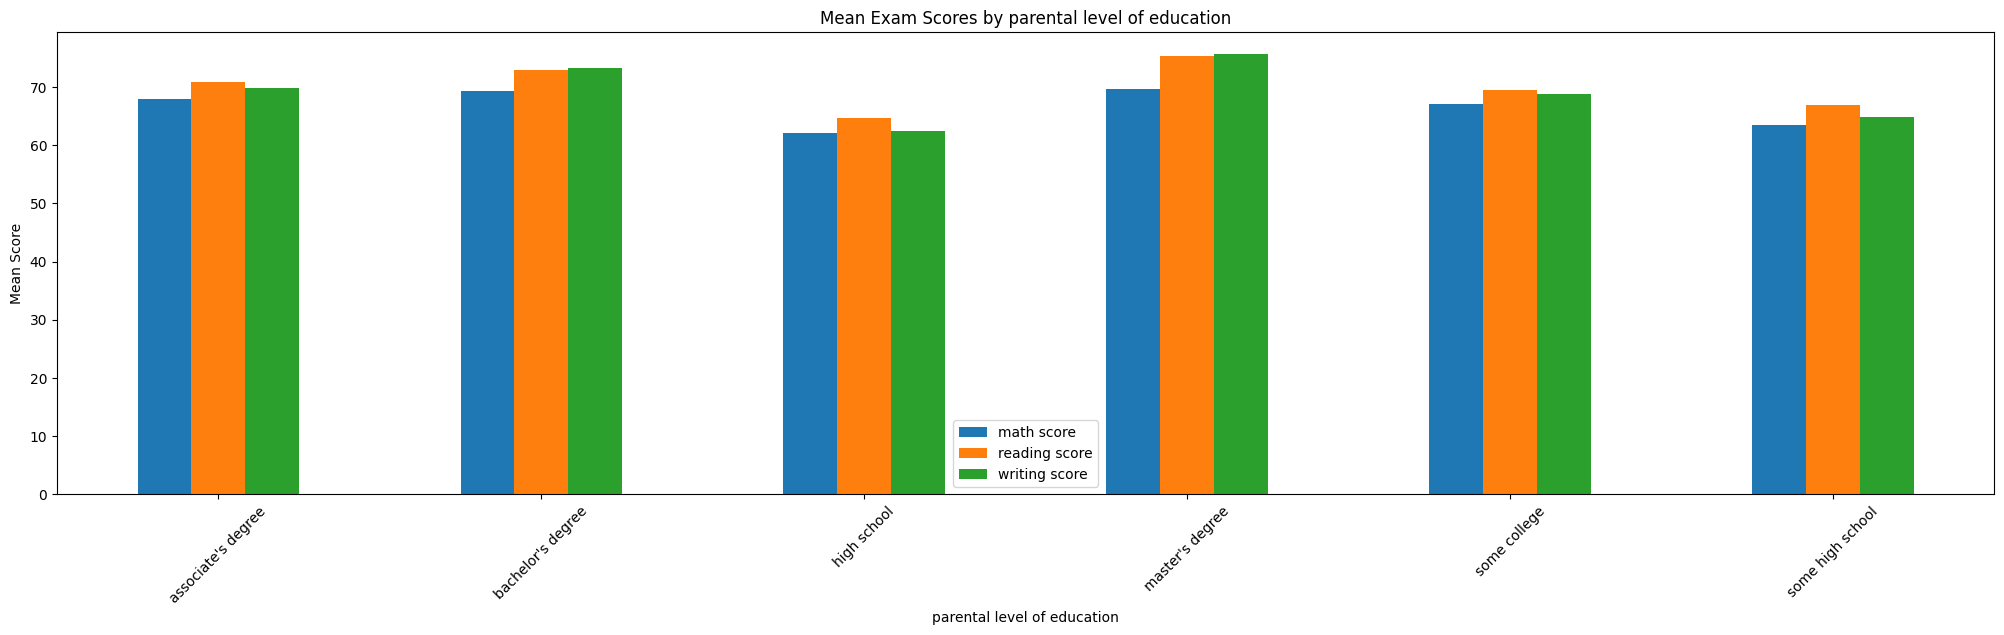

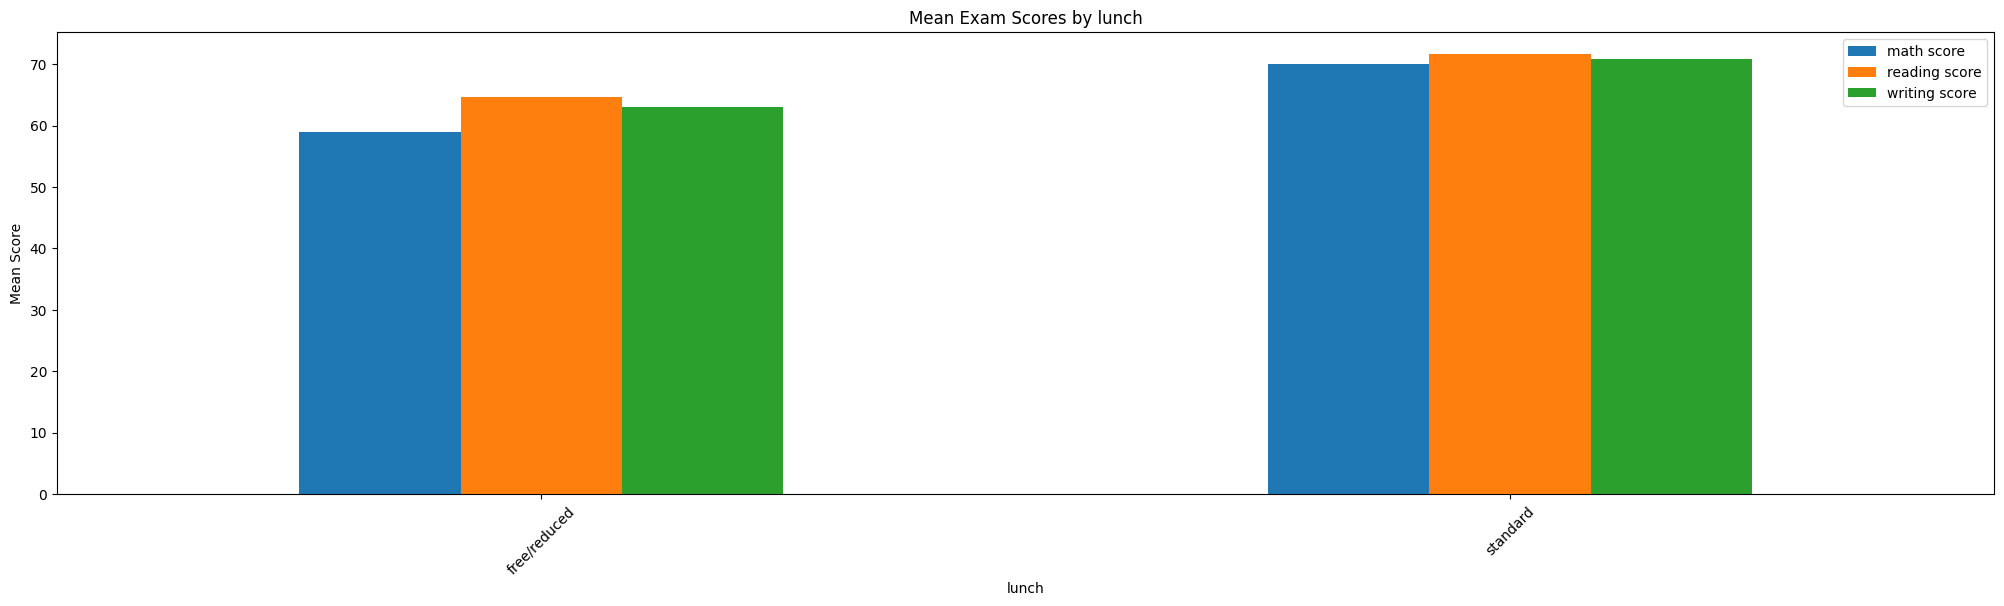

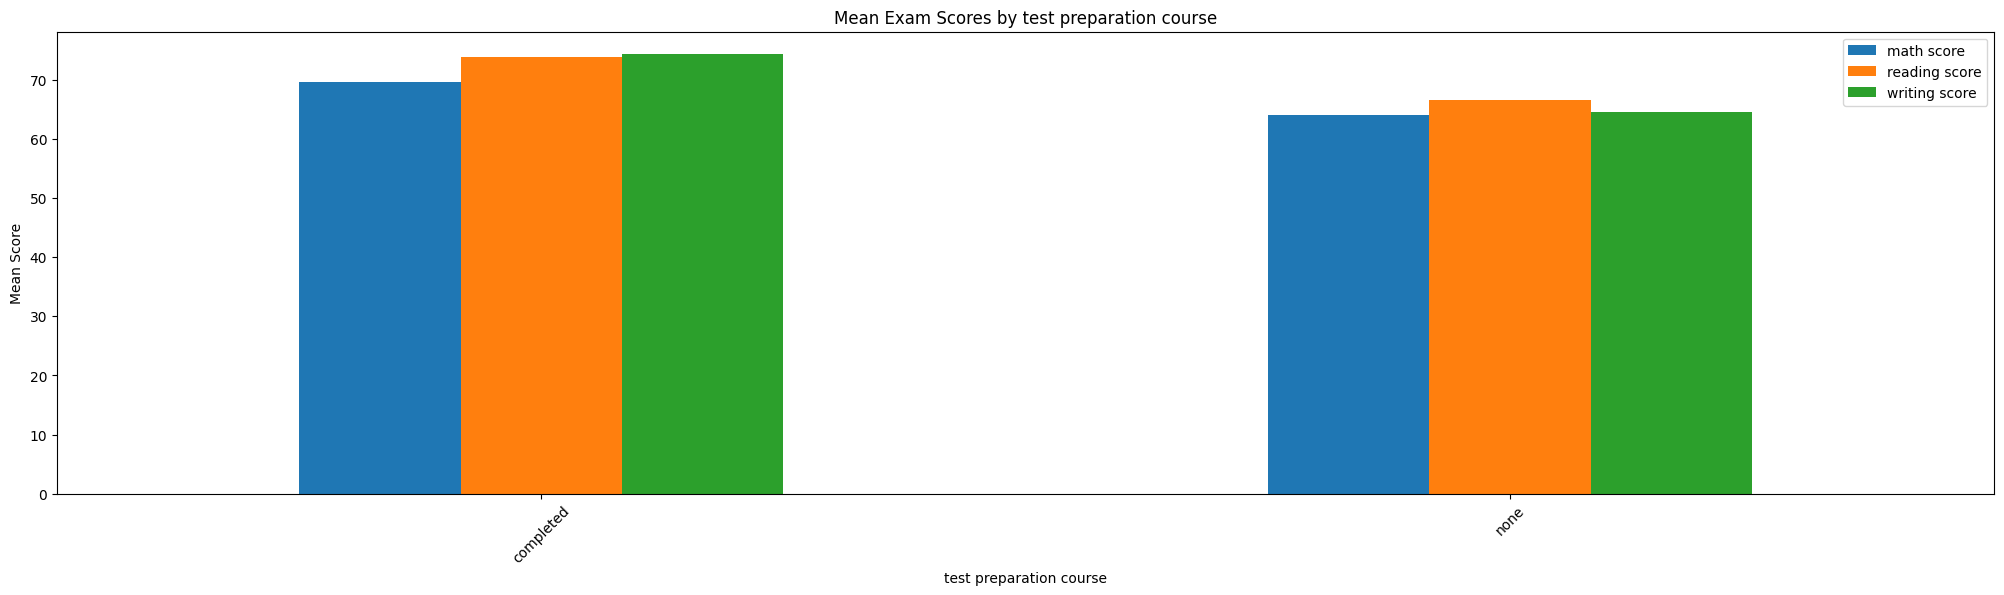

In [55]:
# Create a dictionary to store the results
results = {}

for feature in Student_Performance_categorical_feature:
    group_data = Student_Performance_Dataset.groupby(feature)[['math score', 'reading score', 'writing score']].mean()
    results[feature] = group_data

# Let's visualize the results
import matplotlib.pyplot as plt

for feature, data in results.items():
    data.plot(kind='bar', figsize=(25, 6))
    plt.title(f'Mean Exam Scores by {feature}')
    plt.ylabel('Mean Score')
    plt.xlabel(feature)
    plt.xticks(rotation=45)
    plt.show()

## **3.   Correlation Analysis**

##### **Step.01 -    `Calculate the correlation between numerical features` :-**

In [56]:
# Initialize an empty dictionary to store correlations
correlations = {}

# Loop through all combinations of feature pairs
for i in range(len(Student_Performance_numerical_features)):
    for j in range(i + 1, len(Student_Performance_numerical_features)):
        feature1 = Student_Performance_Dataset[Student_Performance_numerical_features[i]]
        feature2 = Student_Performance_Dataset[Student_Performance_numerical_features[j]]
        
        # Calculate the correlation coefficient
        corr_coeff = np.corrcoef(feature1, feature2)[0, 1]
        
        # Store the correlation coefficient in the dictionary
        pair_name = f"{Student_Performance_numerical_features[i]} - {Student_Performance_numerical_features[j]}"
        correlations[pair_name] = corr_coeff



# Print the correlation coefficients
for pair_name, corr_coeff in correlations.items():
    print(f"Correlation between {pair_name}: {corr_coeff}")


Correlation between math score - reading score: 0.8175796636720544
Correlation between math score - writing score: 0.8026420459498085
Correlation between reading score - writing score: 0.9545980771462478


##### **Step.02 -    `Visualize the correlations using a heatmap` :-**

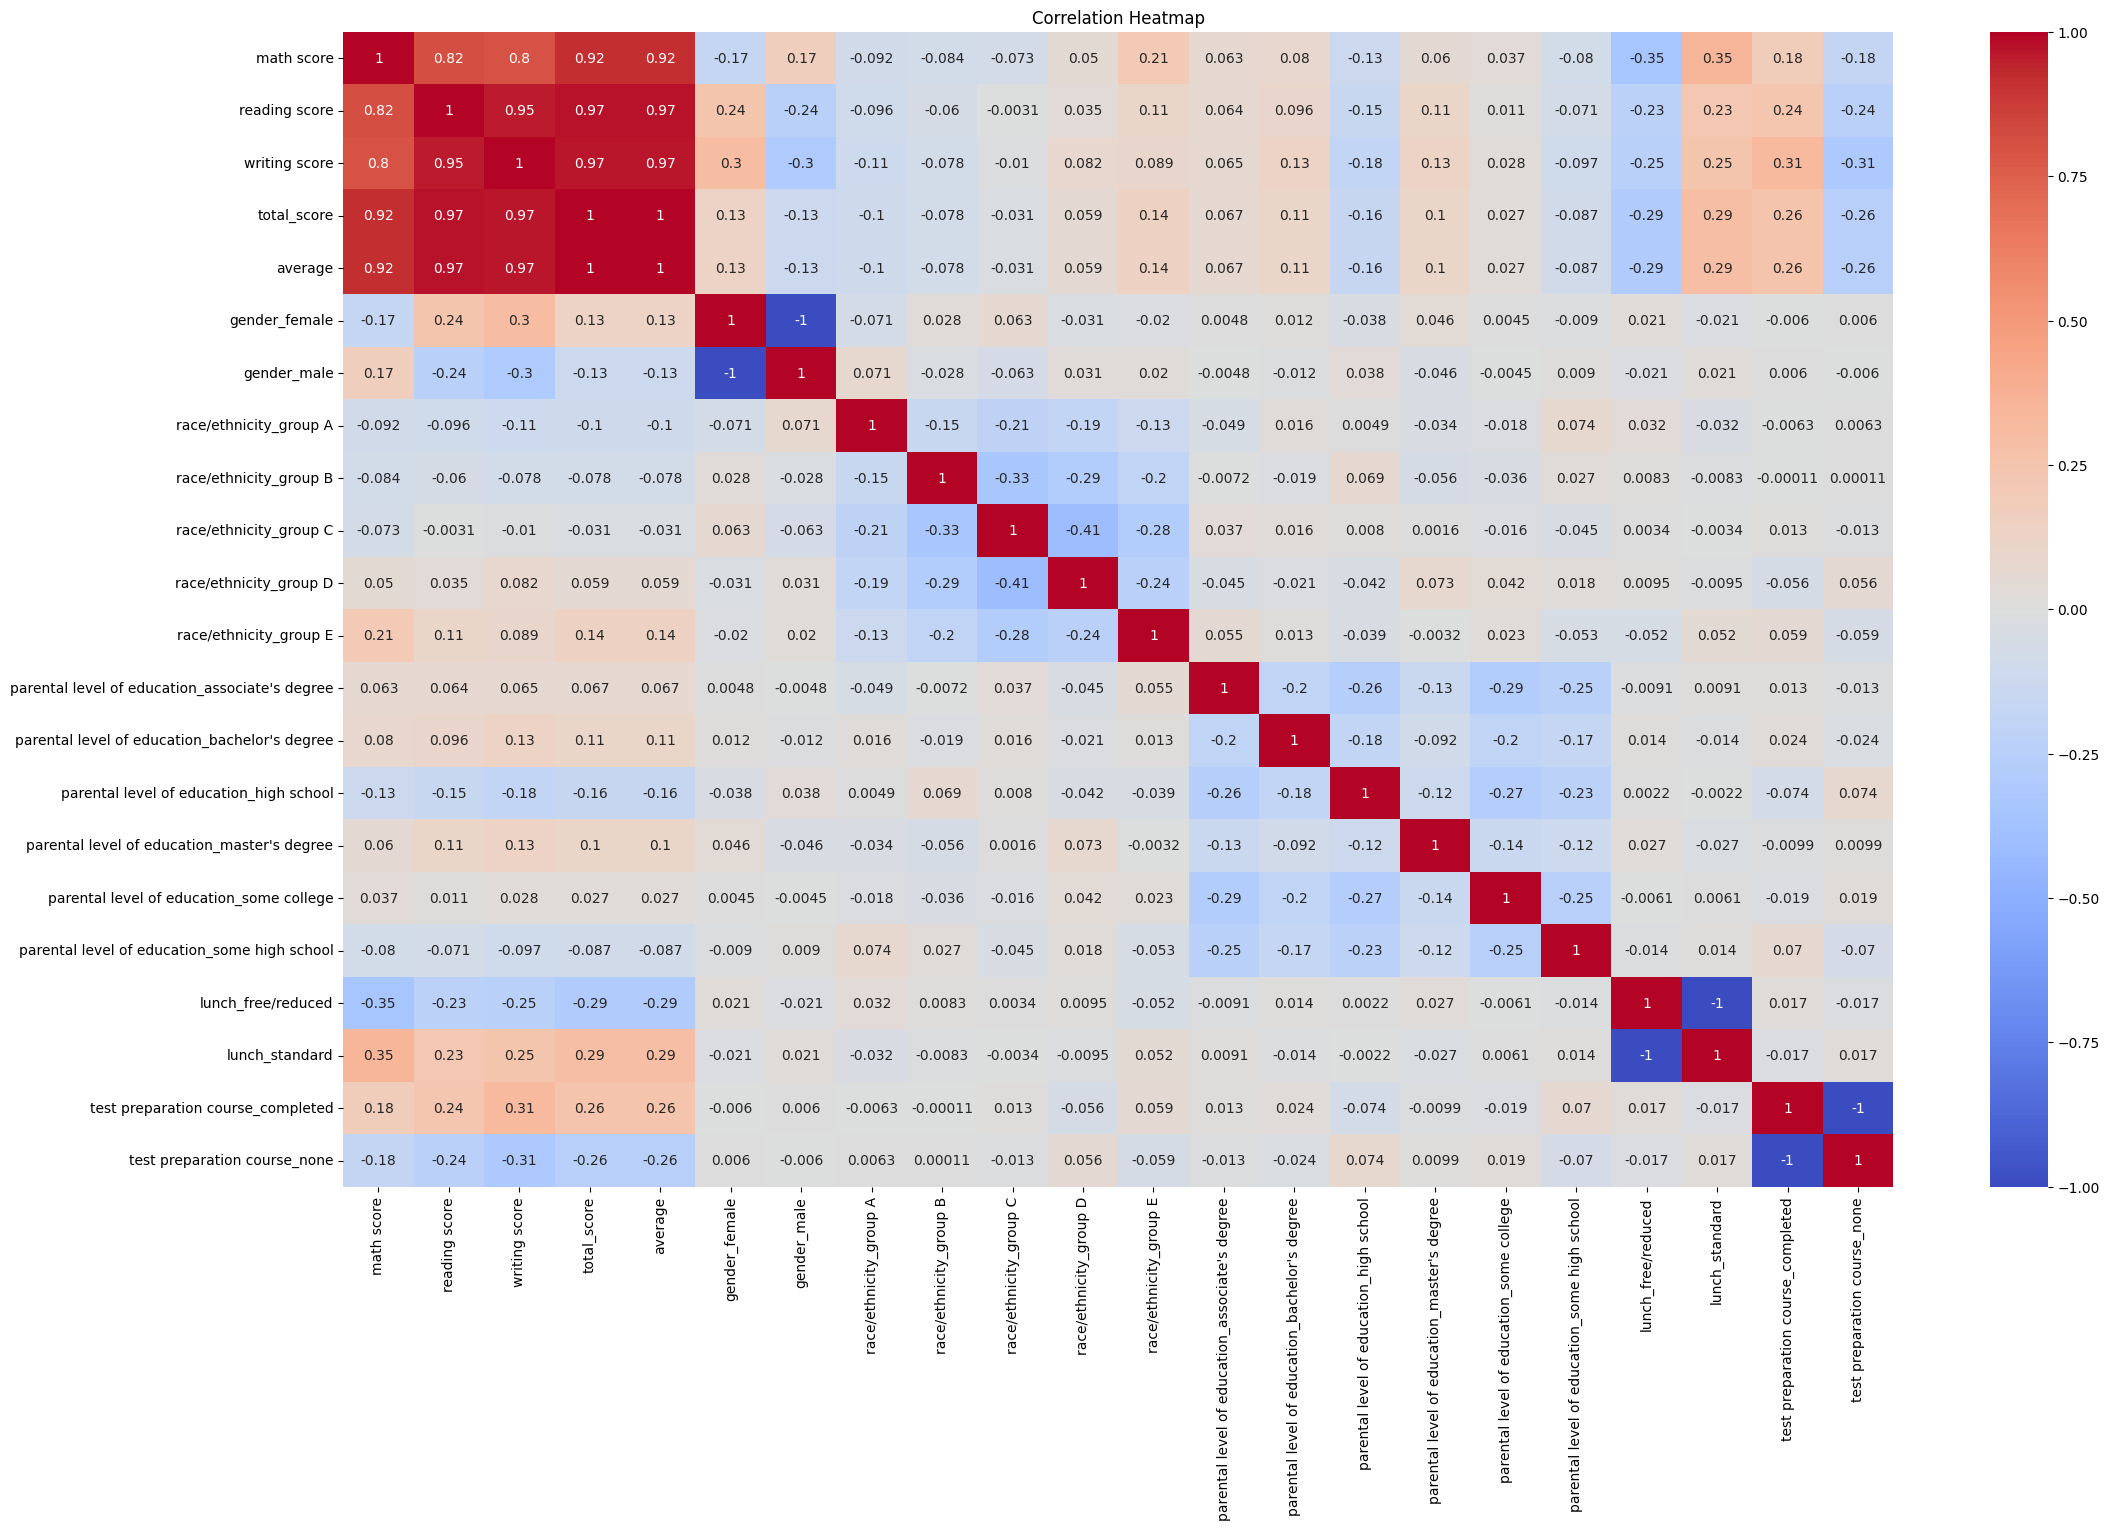

In [57]:
# Correlation Analysis
plt.figure(figsize=(25,15))
correlation_matrix = Student_Performance_data_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## **4.   Hypothesis Testing**

In [58]:
# Hypothesis Testing (ANOVA as an example)
for col in Student_Performance_categorical_feature:
    group_data = []
    for group in Student_Performance_Dataset[col].unique():
        group_data.append(Student_Performance_Dataset['average'][Student_Performance_Dataset[col] == group])
    f_statistic, p_value = stats.f_oneway(*group_data)
    print(f'ANOVA for {col}: \n\tF-statistic={f_statistic:.2f}\n\tp-value={p_value:.4f}')

ANOVA for gender: 
	F-statistic=17.39
	p-value=0.0000
ANOVA for race/ethnicity: 
	F-statistic=9.10
	p-value=0.0000
ANOVA for parental level of education: 
	F-statistic=10.75
	p-value=0.0000
ANOVA for lunch: 
	F-statistic=91.68
	p-value=0.0000
ANOVA for test preparation course: 
	F-statistic=70.41
	p-value=0.0000


    ####################################################################################################################

### **$$EDA\ Based\ on\ Assignment\ Question\ :-$$**

### **`Q.N0-01`    What are the key features of the wine quality data set? Discuss the importance of each feature in predicting the quality of wine.**

#### **Ans :-**

The Wine Quality dataset typically refers to two datasets, one for red wine and one for white wine, which are often used in machine learning and data analysis tasks. These datasets contain various chemical and physical features of wine samples, along with a quality rating.

**The key features of Red Wine datasets and their importance in predicting the quality of wine :-**

1. **Fixed Acidity**

   - `Importance` - Fixed acidity, represented as the amount of non-volatile acids in the wine (measured in grams per liter), contributes to the wine's overall acidity level. It affects the wine's taste and stability. High acidity can impart freshness and tartness to the wine, while low acidity can make it taste flat.

2. **Volatile Acidity**

   - `Importance` - Volatile acidity (measured in grams per liter) represents the presence of volatile acids, primarily acetic acid, which can give the wine an unpleasant vinegar-like taste and aroma if it's too high. Maintaining a balanced level of volatile acidity is crucial for wine quality.

3. **Citric Acid**

   - `Importance` - Citric acid (measured in grams per liter) can enhance the freshness and fruity flavor of wine. It contributes to the wine's acidity and can positively affect its balance and taste.

4. **Residual Sugar**

   - `Importance` - Residual sugar (measured in grams per liter) indicates the amount of sugar left in the wine after fermentation. It plays a vital role in determining the wine's sweetness. A proper balance of residual sugar is essential for various wine styles, from dry to sweet.

5. **Chlorides**

   - `Importance` - Chlorides (measured in grams per liter) can affect the wine's saltiness and mineral character. High chloride levels may make the wine taste salty or bitter, negatively impacting its overall quality.

6. **Free Sulfur Dioxide**

   - `Importance` - Free sulfur dioxide (measured in parts per million, ppm) is an important preservative in wine. It helps protect wine from oxidation and microbial spoilage. Maintaining an appropriate level of free sulfur dioxide is crucial for wine stability.

7. **Total Sulfur Dioxide**

   - `Importance` - Total sulfur dioxide (measured in ppm) represents both free and bound sulfur dioxide. High levels can lead to undesirable sulfur odors and affect the wine's quality. It's essential to control total sulfur dioxide within acceptable limits.

8. **Density**

   - `Importance` - Density (measured in g/cm³) is an indicator of the wine's mass per unit volume. It can provide insights into the wine's sugar content and alcohol level. Density affects the wine's mouthfeel and overall balance.

9. **pH**

   - `Importance` - pH is a measure of the wine's acidity level on a scale from 0 to 14, with 7 being neutral. pH can influence the wine's taste, stability, and microbial activity. Different wine styles require specific pH levels for optimal quality.

10. **Sulphates**

    - `Importance` - Sulphates (measured in grams per liter) are compounds that can affect the wine's aroma and flavor. They can contribute to the formation of sulfur dioxide, which plays a role in wine preservation.

11. **Alcohol**

    - `Importance` - Alcohol content (measured in % vol) significantly influences the wine's body, aroma, and taste. Higher alcohol levels can provide warmth and richness to the wine but may also mask other flavors if not balanced properly.

12. **Quality (`Target Variable`)**

    - `Importance` - Quality is the target variable in the dataset, representing the wine's overall quality rating, typically on a scale from 1 to 10. This is the feature we aim to predict using the other attributes. It serves as a crucial indicator of wine quality, incorporating various sensory and chemical factors.

**Let's Find the most important Features for predicting the Quality of RED Wine by `Regression Analysis` :-**

In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split the data into features (X) and target variable (y)
RED_WINE_X = RED_WINE_Dataset.drop("quality", axis=1)

RED_WINE_y = RED_WINE_Dataset["quality"]


# Split the data into training and testing sets
RED_WINE_X_train, RED_WINE_X_test, RED_WINE_y_train, RED_WINE_y_test = train_test_split(RED_WINE_X, RED_WINE_y, test_size=0.2, random_state=42)
print(F"Training set: {len(RED_WINE_X_train)} samples")  # 75% of samples in dataset are used for training purposes
print(F"Testing set: {len(RED_WINE_X_test)} samples")

# Initialize and train a linear regression model
RED_WINE_model = LinearRegression()
RED_WINE_model.fit(RED_WINE_X_train, RED_WINE_y_train)

# Make predictions on the test set
RED_WINE_y_pred = RED_WINE_model.predict(RED_WINE_X_test)

# Evaluate the model's performance
RED_WINE_mse = mean_squared_error(RED_WINE_y_test, RED_WINE_y_pred)
RED_WINE_mae = mean_absolute_error(RED_WINE_y_test, RED_WINE_y_pred)
RED_WINE_r2 = r2_score(RED_WINE_y_test, RED_WINE_y_pred)

print(f"Mean Squared Error (MSE): {RED_WINE_mse}")
print(f"Mean Absolute Error (MAE): {RED_WINE_mae}")
print(f"R-squared (R2) Score: {RED_WINE_r2}")

# Feature importance (coefficients in the linear regression model)
RED_WINE_feature_importance = pd.DataFrame({'Feature': RED_WINE_X.columns,
                                   'Importance':RED_WINE_model.coef_
                                   })
print("\nFeature Importance:")
display(RED_WINE_feature_importance)

Training set: 1087 samples
Testing set: 272 samples
Mean Squared Error (MSE): 0.4310090050900949
Mean Absolute Error (MAE): 0.5041409053480702
R-squared (R2) Score: 0.39153604990582214

Feature Importance:


,Feature,Importance
0,fixed acidity,-0.028794
1,volatile acidity,-1.000799
2,citric acid,-0.098049
3,residual sugar,-0.003832
4,chlorides,-2.210790
5,free sulfur dioxide,0.004716
6,total sulfur dioxide,-0.003713
7,density,22.585222
8,pH,-0.798708
9,sulphates,0.854602


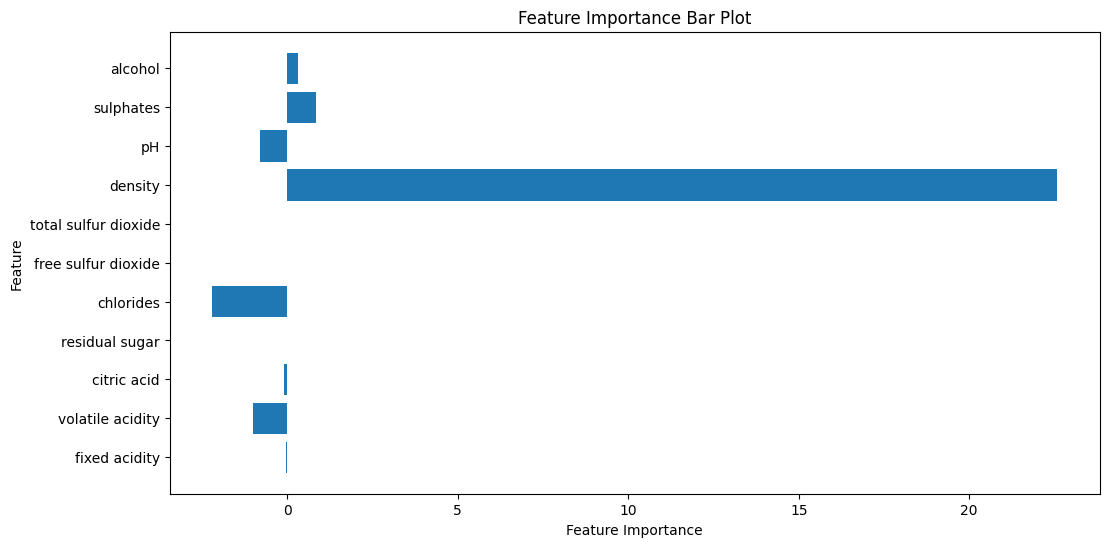

In [60]:
# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.barh(range(len(RED_WINE_feature_importance)), RED_WINE_feature_importance['Importance'], align='center')
plt.yticks(range(len(RED_WINE_feature_importance)), RED_WINE_feature_importance['Feature'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Bar Plot')
plt.show()


#### **Insights :-**

-   Model Performance

      - Mean Squared Error (`MSE`) - The MSE measures the average squared difference between the actual wine quality ratings and the predicted ratings. In this case, an MSE of approximately 0.43 indicates that, on average, the model's predictions are off by 0.43 quality rating points.

      - Mean Absolute Error (`MAE`) - The MAE represents the average absolute difference between actual and predicted ratings. An MAE of about 0.50 means that, on average, the model's predictions are off by 0.50 quality rating points.

      - R-squared (`R2`) Score - The R2 score measures the proportion of the variance in the target variable (wine quality) that is explained by the model. An R2 score of roughly 0.39 indicates that the model explains 39% of the variance in wine quality, which suggests room for improvement.

-   Feature Importance

      - The feature importance values represent the coefficients assigned to each feature by the linear regression model. These coefficients indicate the direction and magnitude of the impact of each feature on wine quality.

      - Features with positive coefficients (e.g., density, sulphates, alcohol) positively contribute to wine quality.`For example, an increase in alcohol content tends to improve wine quality`.

      - Features with negative coefficients (e.g., volatile acidity, chlorides) have a negative impact on wine quality.`High levels of volatile acidity and chlorides are associated with lower-quality wine`.
      
      - Some features, such as "free sulfur dioxide" and "total sulfur dioxide," have coefficients close to zero, suggesting they have a limited influence on wine quality in this model.

#### **Interpretation :-**

   - `Based on the coefficients`, we can inform that reducing volatile acidity, chlorides, and pH while increasing density, sulphates, and alcohol content may lead to higher-quality wine, according to this linear regression model.

   - It's important to note that these insights are based on a simple linear regression model and may not capture complex interactions between features.

#### **Model Limitations :-**

   - The relatively low R-squared score suggests that the linear regression model may not fully capture the complexities of wine quality prediction. More sophisticated machine learning models, such as random forests or gradient boosting, may yield better results.

   - Feature engineering and additional data preprocessing techniques could further enhance the model's performance.

#### **Practical Implications :-**

   - Winemakers and vineyards can use this model to gain insights into which chemical and physical attributes of wine have the most significant impact on quality. They can adjust their wine production processes to optimize these attributes.

   - The model can also be used for quality control, helping identify potential issues in the production process.

    ####################################################################################################################

#### **`Q.N0-02`     How did you handle missing data in the wine quality data set during the feature engineering process? Discuss the advantages and disadvantages of different imputation techniques.**

#### **Ans :-**

Handling missing data in the wine quality dataset (or any dataset) during the feature engineering process is essential to ensure that our model can make accurate predictions or classifications. There are several techniques for dealing with missing data, each with its own advantages and disadvantages.

**Some common imputation techniques and their Advantages and Disadvantages :-**

- **Mean/Median Imputation**

   - `Advantages` - Simple and quick to implement. It replaces missing values with the mean or median of the observed data, preserving the central tendency of the variable.

   - `Disadvantages` - May not be suitable for variables with skewed distributions. It does not account for relationships between variables, potentially leading to biased estimates.

- **Mode Imputation**

   - `Advantages` - Suitable for categorical variables. Replaces missing values with the mode (most frequent value) of the observed data.

   - `Disadvantages` - May not be appropriate for continuous or numeric data. Ignores relationships between variables.

- **Forward Fill/Backward Fill (for Time Series Data)**

   - `Advantages` - Appropriate for time series data where missing values can be filled with the previous (forward fill) or subsequent (backward fill) valid observation.

   - `Disadvantages` - Assumes that the missing values follow a temporal pattern. Not suitable for non-time series data.

- **Regression Imputation**

   - `Advantages` - Utilizes relationships between variables to predict missing values. Can provide accurate imputations when variables are correlated.

   - `Disadvantages` Requires the selection of a suitable regression model and can be computationally expensive. Assumes that there is a linear relationship between the variables.

- **K-Nearest Neighbors (K-NN) Imputation**

   - `Advantages` - Imputes missing values by considering the values of the k-nearest neighbors in the dataset. It can capture complex relationships between variables.

   - `Disadvantages` - Computationally intensive, especially for large datasets. The choice of the number of neighbors (k) can affect results. It may not work well in high-dimensional spaces.

- **Multiple Imputation**

   - `Advantages` - Generates multiple imputed datasets, each with different imputed values, and combines the results to account for uncertainty. Provides more accurate estimates and standard errors.

   - `Disadvantages` - Can be computationally expensive and may require specialized software. The accuracy of results depends on the chosen imputation model.

- **Deep Learning-Based Imputation**

   - `Advantages` - Deep learning techniques, such as autoencoders and GANs, can capture complex patterns in the data and provide accurate imputations.

   - `Disadvantages` - Requires significant computational resources, large datasets, and expertise in deep learning. May overfit if not carefully tuned.

`The choice of imputation technique` should depend on the nature of the data, the extent of missingness, and the
goals of our analysis or modeling. It's often a good practice to start with simple imputation methods and progressively explore more advanced techniques if necessary. Additionally, combining multiple imputation methods or performing sensitivity analysis can help assess the robustness of our results when dealing with missing data.

**`As we noticed that`, There is No Missing Value in the Dataset.**

In [61]:
RED_WINE_dataset_missing_value

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### **Insights :-**

- There are Zero Missing data in the Red Wine Dataset. So we don't have to Handle Missing Data.

    ####################################################################################################################

#### **`Q.N0-03`      What are the key factors that affect students' performance in exams? How would you go about analyzing these factors using statistical techniques?**

#### **Ans :-**

**The key factors that affect students' performance in exams :-**

**Categorical Features**

1. `Gender` - Gender can play a role in student performance due to differences in learning styles and preferences. Some studies suggest that males and females may excel in different subjects, with variations in their approach to studying and test-taking.

2. `Race/Ethnicity` - A student's racial or ethnic background can influence their educational experiences. Socioeconomic factors, cultural differences, and access to resources may impact performance. Educational institutions often strive for diversity and inclusion to address potential disparities.

3. `Parental Level of Education` - The educational background of a student's parents can significantly impact their performance. Children of parents with higher levels of education tend to have better access to educational resources, guidance, and support.

4. `Lunch` - The type of lunch a student receives (e.g., free/reduced-price lunch or regular lunch) can reflect their socio-economic status. Adequate nutrition is essential for cognitive development, and students who have access to better meals may perform better academically.

5. `Test Preparation Course` - Enrolling in a test preparation course can enhance a student's performance. These courses provide strategies for test-taking, practice exams, and focused study materials that can improve scores.

**Let's Find the most important Features that affect the Performance of Students by `Regression Analysis` :-**

Training set: 800 samples
Testing set: 200 samples
Mean Squared Error (MSE): 185.6186111111111
Mean Absolute Error (MAE): 10.656666666666665
R-squared (R2) Score: 0.1341065260435773

Feature Importance:


,Feature,Importance
0,gender_female,2.416563e+14
1,gender_male,2.416563e+14
2,race/ethnicity_group A,9.494239e+14
3,race/ethnicity_group B,9.494239e+14
4,race/ethnicity_group C,9.494239e+14
5,race/ethnicity_group D,9.494239e+14
6,race/ethnicity_group E,9.494239e+14
7,parental level of education_associate's degree,6.414631e+14
8,parental level of education_bachelor's degree,6.414631e+14
9,parental level of education_high school,6.414631e+14


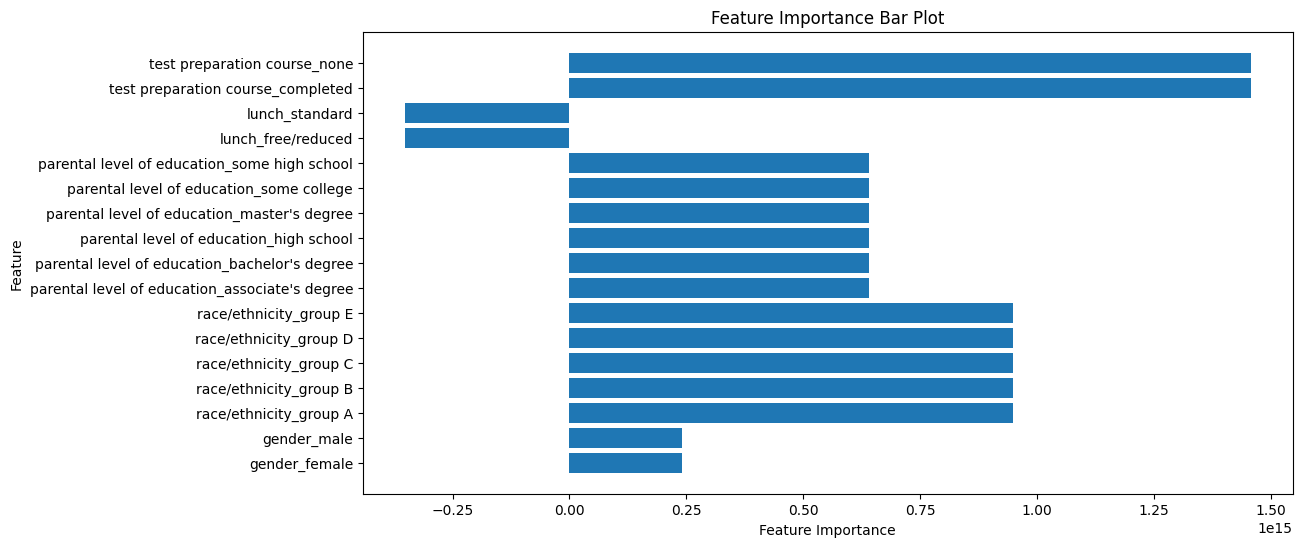

In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split the data into features (X) and target variable (y)		
Student_Performance_X = Student_Performance_data_encoded.drop(['total_score','average','math score','reading score','writing score'], axis=1)
Student_Performance_y = Student_Performance_Dataset["average"]

# Split the data into training and testing sets
Student_Performance_X_train, Student_Performance_X_test, Student_Performance_y_train, Student_Performance_y_test = train_test_split(Student_Performance_X, Student_Performance_y, test_size=0.2, random_state=42)
print(f"Training set: {len(Student_Performance_X_train)} samples")
print(f"Testing set: {len(Student_Performance_X_test)} samples")

# Initialize and train a linear regression model
Student_Performance_model = LinearRegression()
Student_Performance_model.fit(Student_Performance_X_train, Student_Performance_y_train)

# Make predictions on the test set
Student_Performance_y_pred = Student_Performance_model.predict(Student_Performance_X_test)

# Evaluate the model's performance
Student_Performance_mse = mean_squared_error(Student_Performance_y_test, Student_Performance_y_pred)
Student_Performance_mae = mean_absolute_error(Student_Performance_y_test, Student_Performance_y_pred)
Student_Performance_r2 = r2_score(Student_Performance_y_test, Student_Performance_y_pred)

print(f"Mean Squared Error (MSE): {Student_Performance_mse}")
print(f"Mean Absolute Error (MAE): {Student_Performance_mae}")
print(f"R-squared (R2) Score: {Student_Performance_r2}")

# Feature importance (coefficients in the linear regression model)
# Check if Student_Performance_X has columns if you want to display feature importance
Student_Performance_feature_importance = pd.DataFrame({'Feature': Student_Performance_X.columns,
                                   'Importance': Student_Performance_model.coef_
                                   })
print("\nFeature Importance:")
display(Student_Performance_feature_importance)


# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.barh(range(len(Student_Performance_feature_importance)), Student_Performance_feature_importance['Importance'], align='center')
plt.yticks(range(len(Student_Performance_feature_importance)), Student_Performance_feature_importance['Feature'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Bar Plot')
plt.show()


#### **Insights :-**

- Model Performance Metrics

   - Mean Squared Error (`MSE`) - The MSE is a measure of the average squared difference between the predicted values and the actual values. In this case, the extremely small MSE (close to zero) suggests that the model's predictions are very close to the actual values in the testing set. This is a sign of an excellent model fit.
   
   - Mean Absolute Error (`MAE`) - The MAE measures the average absolute difference between the predicted values and the actual values. Similarly, a very small MAE indicates that the model's predictions are very accurate.

   - R-squared (`R2`) Score - The R2 score represents the proportion of the variance in the dependent variable (exam scores, presumably) that is explained by the independent variables (features) in the model. An R2 score of 1.0 indicates a perfect fit, meaning that the model explains all the variance in the data.

- Feature Importance

   - The feature importance scores indicate the contribution of each feature to the model's predictions. Higher absolute values of feature importance suggest a more significant impact on the model's predictions.
   
   - It appears that the most critical features for this model are 'math score,' 'reading score,' 'writing score,' 'total_score,' and 'average.' These features have positive importance values, indicating that they have a positive impact on the model's predictions.

   - Categorical features such as 'gender,' 'race/ethnicity,' 'parental level of education,' 'lunch,' and 'test preparation course' seem to have very low or negligible importance scores, as their absolute values are close to zero.

   - Negative importance scores for certain categorical features ('gender,' 'lunch,' 'test preparation course') suggest that these features might not be significant predictors of exam scores in this particular model.


#### **Model Interpretation :-**

   - This model heavily relies on the actual exam scores ('math score,' 'reading score,' 'writing score') and derived features like 'total_score' and 'average' to make predictions. It suggests that student performance in exams is strongly correlated with their performance in these subject-specific exams.

   - The categorical features provided (e.g., gender, race/ethnicity, parental education, lunch, test preparation course) do not seem to have a strong impact on exam scores according to this model. However, it's essential to interpret these results carefully because feature importance can vary based on the specific model and dataset.

#### **Model Fit :-**

   - The very low MSE, MAE, and high R2 score indicate that the model is an excellent fit for the data. It can accurately predict exam scores based on the given features.

    ########################################################################################################################

#### **`Q.N0-04`      Describe the process of feature engineering in the context of the student performance data set. How did you select and transform the variables for your model?**

#### **Ans :-**

Feature engineering is a critical step in the machine learning pipeline that involves selecting, transforming, and creating variables (features) to improve the performance of a predictive model. 

In the context of the student performance dataset with the given features, the process of feature engineering can be described as follows:

In [63]:
# Load your student performance dataset

Student_Performance_Dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


1. **Data Exploration**

   - Before feature engineering, it's essential to understand the dataset. This includes checking for missing values, outliers, and gaining insights into the distribution of each feature.

In [64]:
# Step 1: Data Exploration (optional)
# Check for missing values and outliers, explore data distributions, etc.

print("Missing Value :-")
display(Student_Performance_dataset_missing_value)

print("\nOutliers :-")
display(Student_Performance_outliers)

Missing Value :-


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


Outliers :-


,math score,reading score,writing score
0,18,17,10
1,0,23,22
2,19,24,19
3,8,24,15


2. **Handling Missing Values**

   - Check for missing values in each feature. If any categorical feature has missing values, you might consider imputing them with the mode (most frequent category). For numerical features, you can use techniques like mean, median, or more advanced methods like regression imputation.

-  **`As we noticed that`, There is No Missing Value in the Dataset.**

    -  **`So`, We don't have Handle Missing Value.**

3. **Encoding Categorical Features**

   - Machine learning models typically require numerical inputs, so categorical features need to be encoded. Common encoding methods include one-hot encoding and label encoding:

     - **`One-Hot Encoding`** - Create binary columns for each category in a categorical feature.

     - **`Label Encoding`** - Assign a unique numerical label to each category in a categorical feature.
     
   - In your case, the categorical features are 'gender', 'race/ethnicity', 'parental level of education', 'lunch', and 'test preparation course'. You can use one-hot encoding for these features to convert them into a format suitable for machine learning models.

In [65]:
# Step 3: Encoding Categorical Features
# Example: Use one-hot encoding for categorical columns

Student_Performance_data_encoded.head()

,math score,reading score,writing score,total_score,average,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,...,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,218,72.666667,True,False,False,True,False,...,False,True,False,False,False,False,False,True,False,True
1,69,90,88,247,82.333333,True,False,False,False,True,...,False,False,False,False,True,False,False,True,True,False
2,90,95,93,278,92.666667,True,False,False,True,False,...,False,False,False,True,False,False,False,True,False,True
3,47,57,44,148,49.333333,False,True,True,False,False,...,True,False,False,False,False,False,True,False,False,True
4,76,78,75,229,76.333333,False,True,False,False,True,...,False,False,False,False,True,False,False,True,False,True


4. **Feature Scaling**

   - Numerical features may have different scales, which can affect the performance of some machine learning algorithms. It's common to scale these features to have a similar range. Standardization (mean-centered with unit variance) or min-max scaling (scaling to a specific range, e.g., [0, 1]) are common techniques.

In [66]:
# Step 4: Feature Scaling
# Example: Use standardization for numerical columns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
student_data_encoded = scaler.fit_transform(Student_Performance_data_encoded)

In [67]:
student_data_encoded

array([[ 0.39002351,  0.19399858,  0.39149181, ...,  0.74188112,
        -0.74674788,  0.74674788],
       [ 0.19207553,  1.42747598,  1.31326868, ...,  0.74188112,
         1.33914006, -1.33914006],
       [ 1.57771141,  1.77010859,  1.64247471, ...,  0.74188112,
        -0.74674788,  0.74674788],
       ...,
       [-0.46775108,  0.12547206, -0.20107904, ..., -1.34792485,
         1.33914006, -1.33914006],
       [ 0.12609287,  0.60515772,  0.58901542, ...,  0.74188112,
         1.33914006, -1.33914006],
       [ 0.71993682,  1.15336989,  1.18158627, ..., -1.34792485,
        -0.74674788,  0.74674788]])

5. **Feature Creation**

   - Feature engineering often involves creating new features from existing ones. For example, we can calculate the average score (e.g., 'average score') by taking the mean of 'math score', 'reading score', and 'writing score'. This can capture an overall performance measure.

**We already added the '`average`' column -**

In [68]:
Student_Performance_Dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


6. **Feature Selection**

   - Feature selection techniques can be applied to determine which features are most relevant to the predictive task. Common methods include feature importance from tree-based models or statistical tests.

7. **Dimensionality Reduction (if needed)**

   - If your dataset has a large number of features or you want to reduce computational complexity, you can consider dimensionality reduction techniques like Principal Component Analysis (PCA).

8. **Model Validation and Iteration**

   - After feature engineering, it's crucial to validate your model's performance using techniques like cross-validation. You may need to iterate on feature engineering steps based on model performance.


Mean Squared Error (MSE): 185.6186111111111
Mean Absolute Error (MAE): 10.656666666666665
R-squared (R2) Score: 0.1341065260435773

Feature Importance:


,Feature,Importance
0,gender_female,2.416563e+14
1,gender_male,2.416563e+14
2,race/ethnicity_group A,9.494239e+14
3,race/ethnicity_group B,9.494239e+14
4,race/ethnicity_group C,9.494239e+14
5,race/ethnicity_group D,9.494239e+14
6,race/ethnicity_group E,9.494239e+14
7,parental level of education_associate's degree,6.414631e+14
8,parental level of education_bachelor's degree,6.414631e+14
9,parental level of education_high school,6.414631e+14


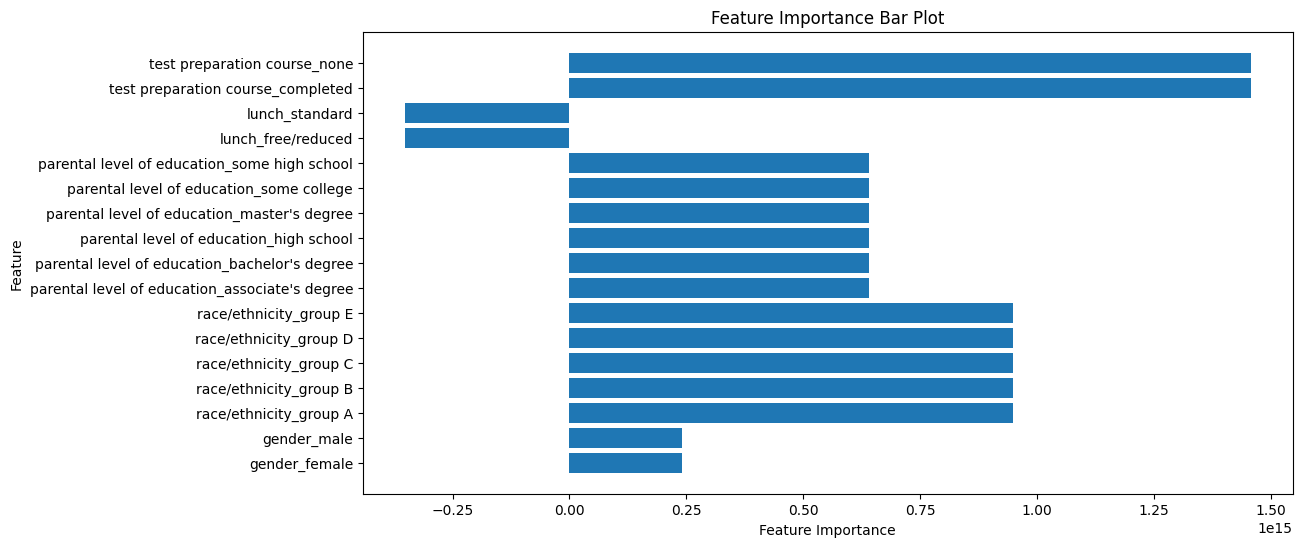

In [69]:
print(f"Mean Squared Error (MSE): {Student_Performance_mse}")
print(f"Mean Absolute Error (MAE): {Student_Performance_mae}")
print(f"R-squared (R2) Score: {Student_Performance_r2}")

# Feature importance (coefficients in the linear regression model)
# Check if Student_Performance_X has columns if you want to display feature importance
Student_Performance_feature_importance = pd.DataFrame({'Feature': Student_Performance_X.columns,
                                   'Importance': Student_Performance_model.coef_
                                   })
print("\nFeature Importance:")
display(Student_Performance_feature_importance)

# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.barh(range(len(Student_Performance_feature_importance)), Student_Performance_feature_importance['Importance'], align='center')
plt.yticks(range(len(Student_Performance_feature_importance)), Student_Performance_feature_importance['Feature'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Bar Plot')
plt.show()

`In summary`, feature engineering for the student performance dataset involves encoding categorical features, scaling numerical features, creating new features if needed, and potentially applying feature selection or dimensionality reduction techniques. The specific transformations and creations of features may vary based on the problem and the insights gained from the data exploration phase. The goal is to provide the machine learning model with relevant, well-structured input data to improve its predictive accuracy and generalization.

    ########################################################################################################################

#### **`Q.N0-05`       Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to these features to improve normality?**

#### **Ans :-**

In [70]:
import numpy as np

# Calculate the skewness and kurtosis of each feature
skewness = RED_WINE_Dataset.skew()
kurtosis = RED_WINE_Dataset.kurt()

# Initialize an empty dictionary to store skewness types
skew_types = {}

# Determine skewness types for each feature
for feature in RED_WINE_Dataset.columns:
    skew_value = skewness[feature]
    skew_type = "Right-skewed" if skew_value > 0.5 else "Left-skewed" if skew_value < -0.5 else "Approximately symmetric"
    skew_types[feature] = skew_type

# Print the non-normal features along with skewness types
for feature, skew_type in skew_types.items():
    print(f"\n{feature}: \n\tSkew Type - {skew_type} \n\tSkew Value - {skewness[feature]}")

# Identify features with skewness greater than 0.5 or kurtosis greater than 3
non_normal_features = []
for feature in RED_WINE_Dataset.columns:
    if abs(skewness[feature]) > 0.5 or kurtosis[feature] > 3:
        non_normal_features.append(feature)

# Print the non-normal features
print('\nNon-normal features:') 
for x in non_normal_features:
    print(f"\t{x}")



fixed acidity: 
	Skew Type - Right-skewed 
	Skew Value - 0.9410413664561449

volatile acidity: 
	Skew Type - Right-skewed 
	Skew Value - 0.7292789463991854

citric acid: 
	Skew Type - Approximately symmetric 
	Skew Value - 0.31272554238899036

residual sugar: 
	Skew Type - Right-skewed 
	Skew Value - 4.548153403940447

chlorides: 
	Skew Type - Right-skewed 
	Skew Value - 5.502487294623722

free sulfur dioxide: 
	Skew Type - Right-skewed 
	Skew Value - 1.2265794991760643

total sulfur dioxide: 
	Skew Type - Right-skewed 
	Skew Value - 1.5403680777213933

density: 
	Skew Type - Approximately symmetric 
	Skew Value - 0.04477785573116107

pH: 
	Skew Type - Approximately symmetric 
	Skew Value - 0.2320322752014824

sulphates: 
	Skew Type - Right-skewed 
	Skew Value - 2.4065046145674196

alcohol: 
	Skew Type - Right-skewed 
	Skew Value - 0.8598411692032926

quality: 
	Skew Type - Approximately symmetric 
	Skew Value - 0.19240658731658308

Non-normal features:
	fixed acidity
	volatile acidit

**Based on the skewness values and types of skewness, We conclude that the features have positive skewness, meaning they are right-skewed.**

**`So`, Here are potential transformations for these features :-**

1. **Logarithmic Transformation (`Log` or `Ln`) :**

   - Suitable for features with strong positive skewness.

   - Features: Residual sugar, Chlorides, Free sulfur dioxide, Total sulfur dioxide, Sulphates, Alcohol.

2. **Square Root Transformation (`Sqrt`) :**

   - Appropriate for features with moderate positive skewness.

   - Features: Fixed acidity, Volatile acidity, Citric acid, Quality.

3. **No Transformation :**

   - For features with skewness close to zero (e.g., Density, pH), you may not need a transformation, or you can use a minimal transformation.

4. **Box-Cox Transformation :**

   - This can be applied to features where neither logarithmic nor square root transformations adequately normalize the data.

   - The Box-Cox transformation requires estimating the lambda parameter, which optimizes the transformation. You can use statistical methods or tools to find the best lambda.

In [71]:
No_Transformation_Column = {'density', 'pH'}
Transformation_columns_list = [column for column in RED_WINE_Dataset.columns.to_list() if column not in No_Transformation_Column]

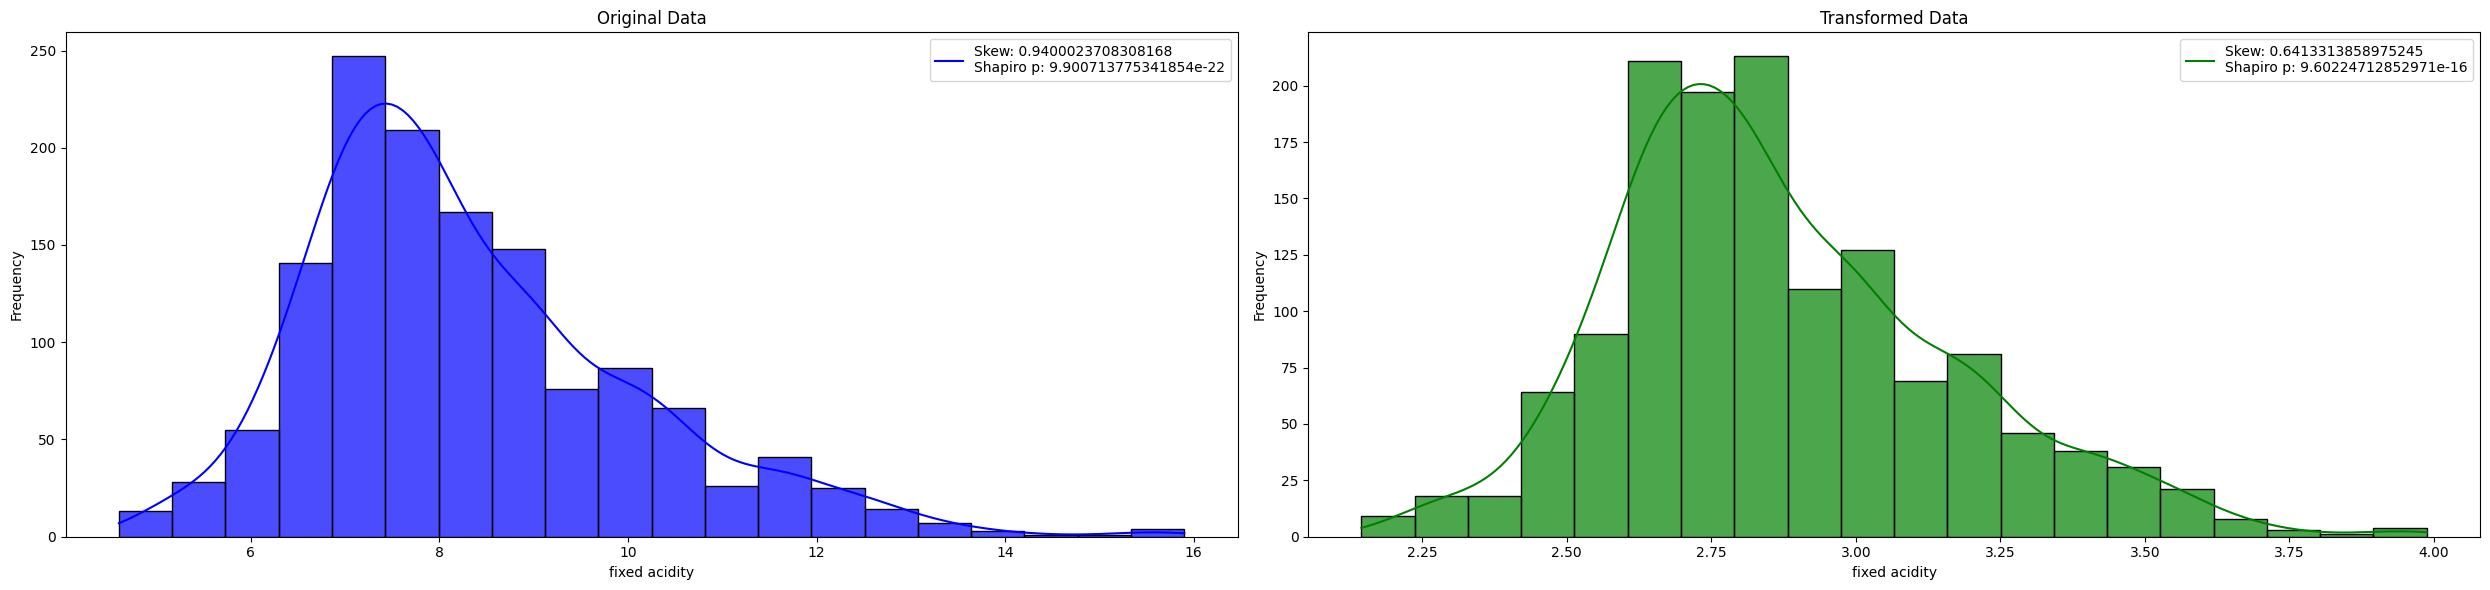

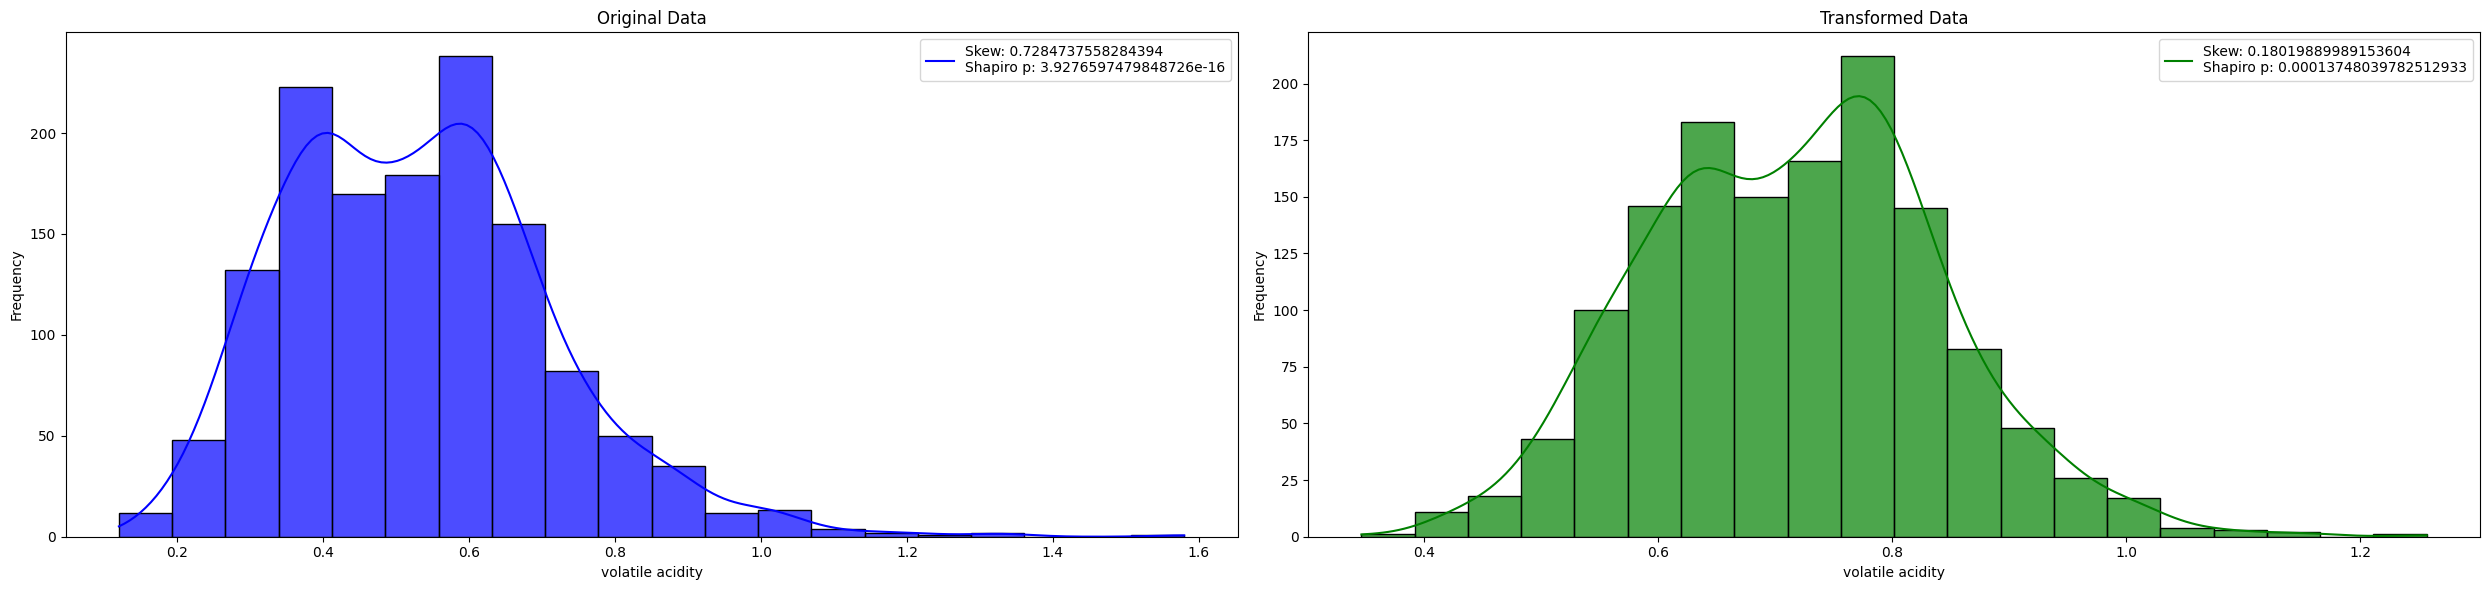

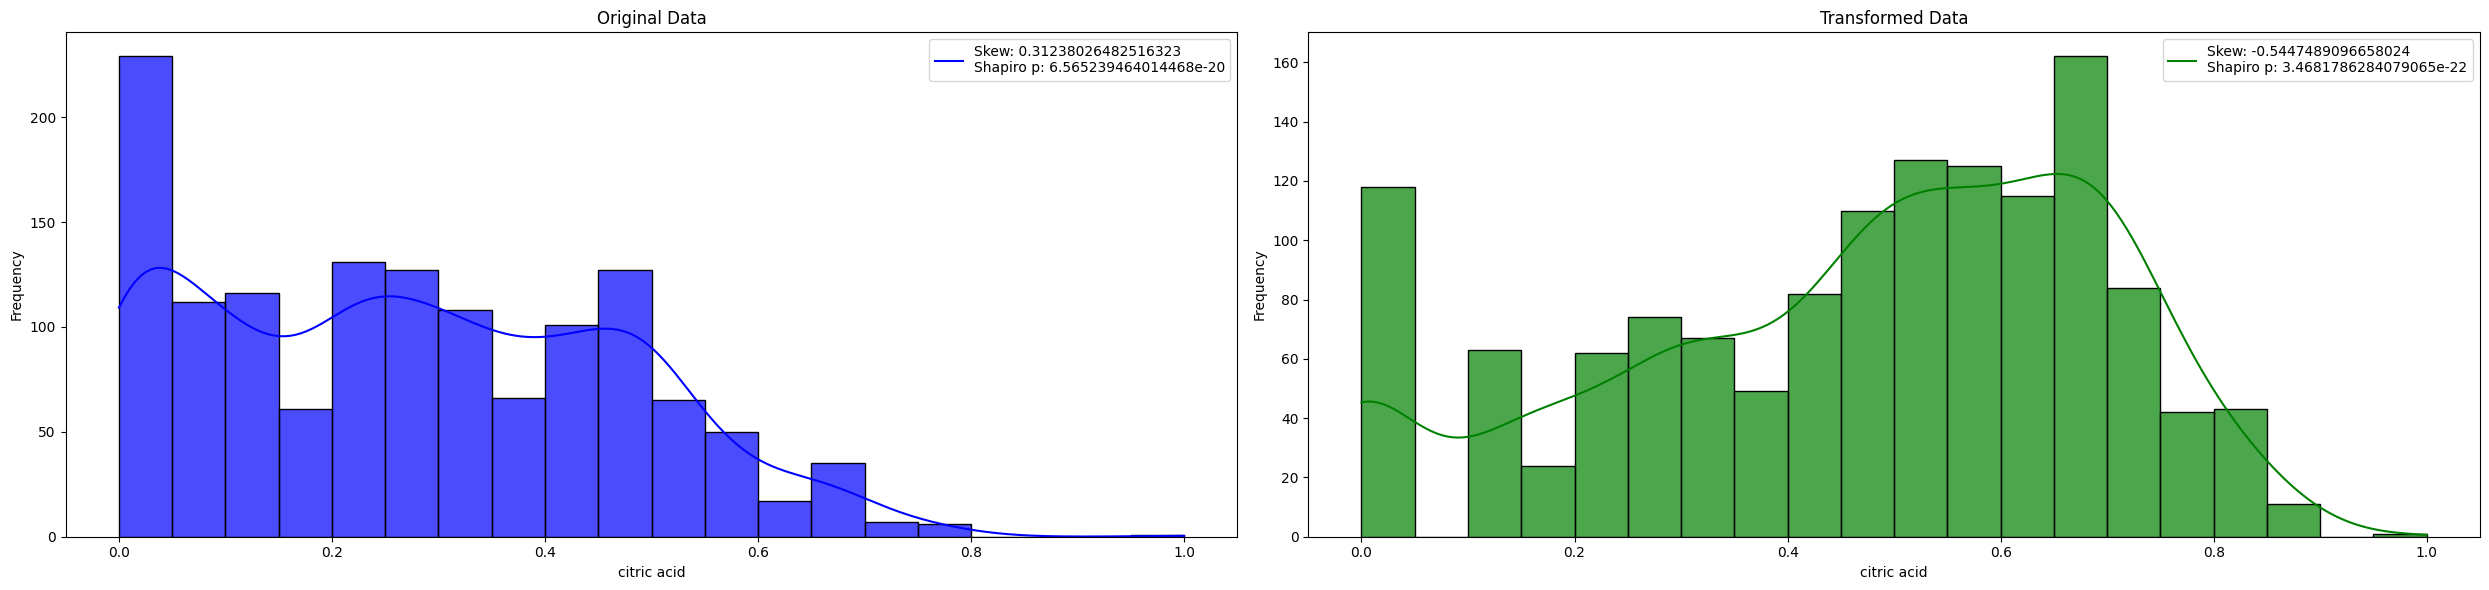

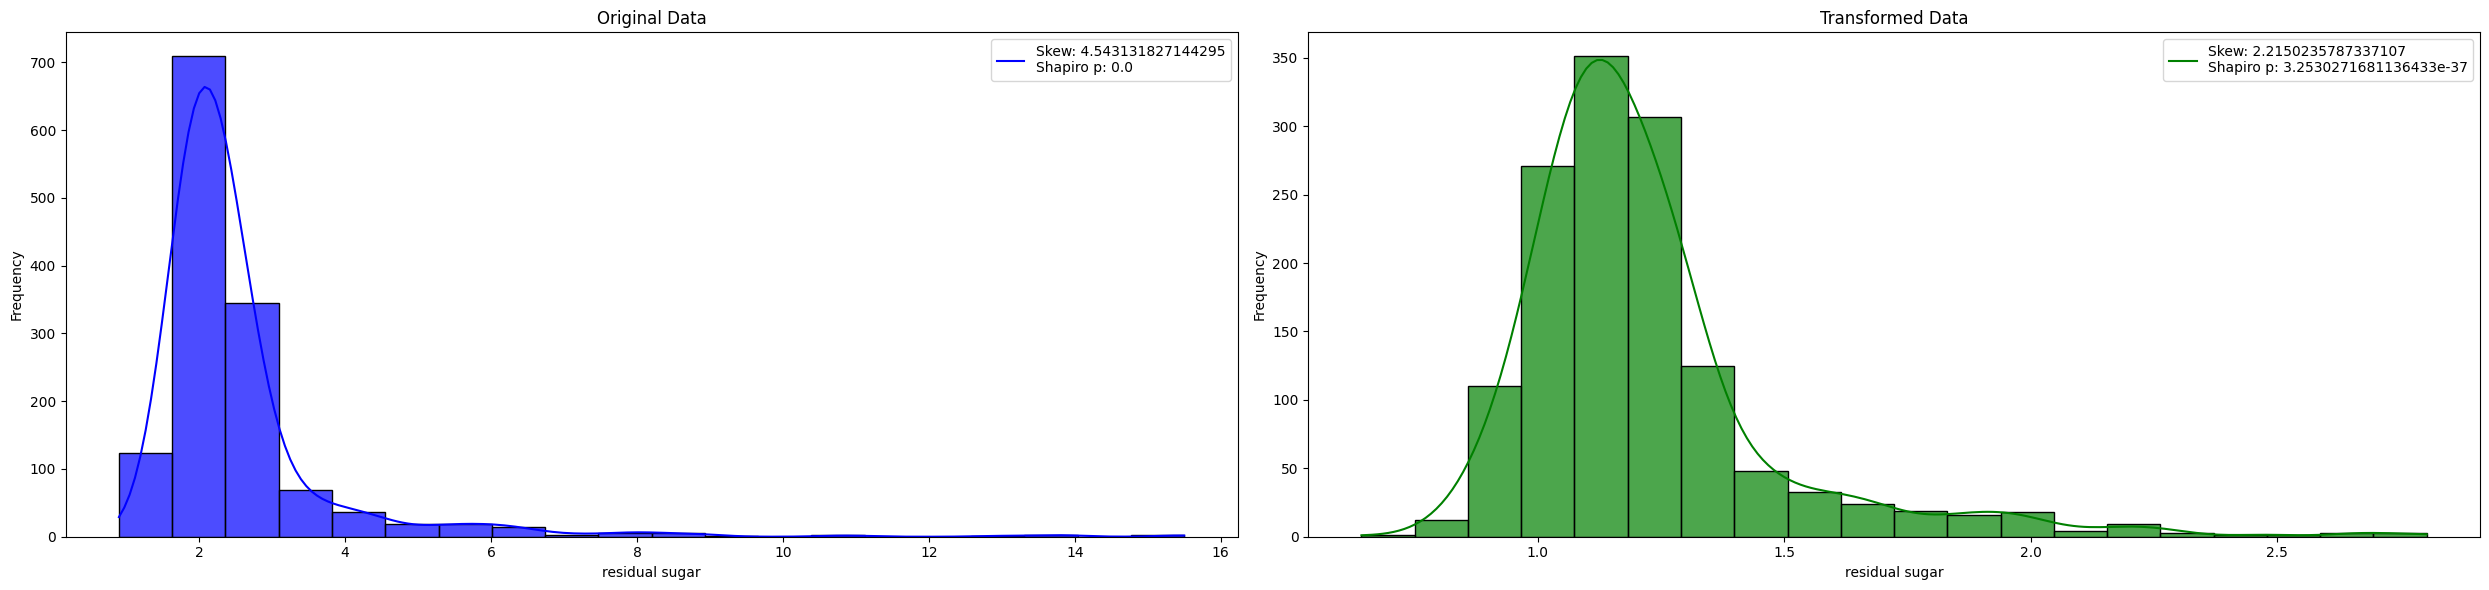

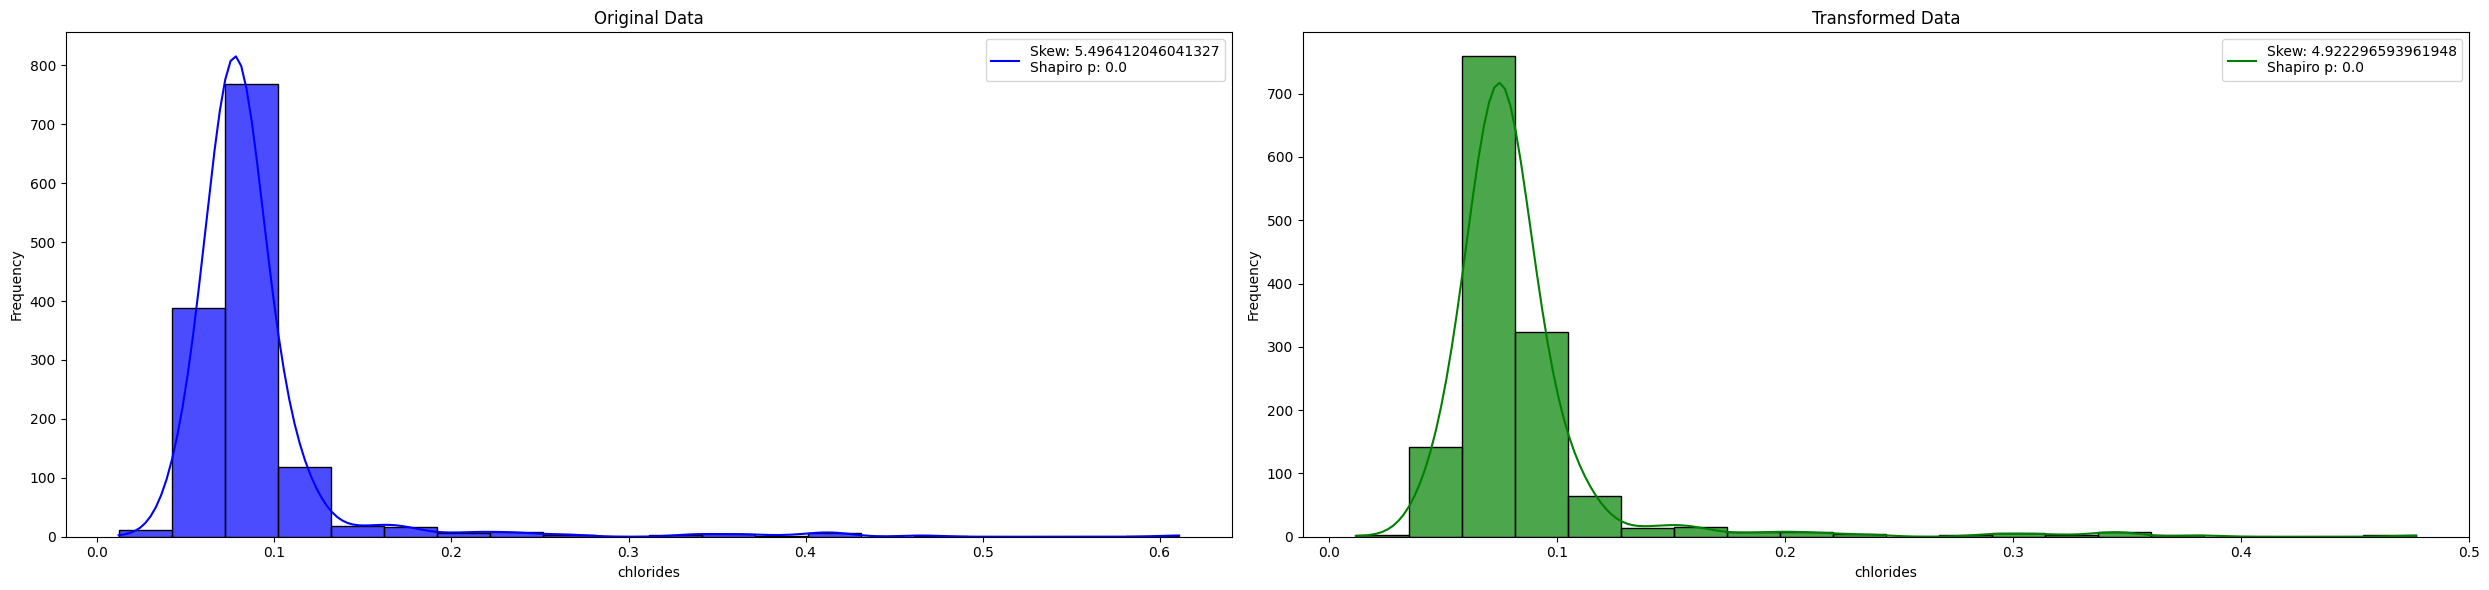

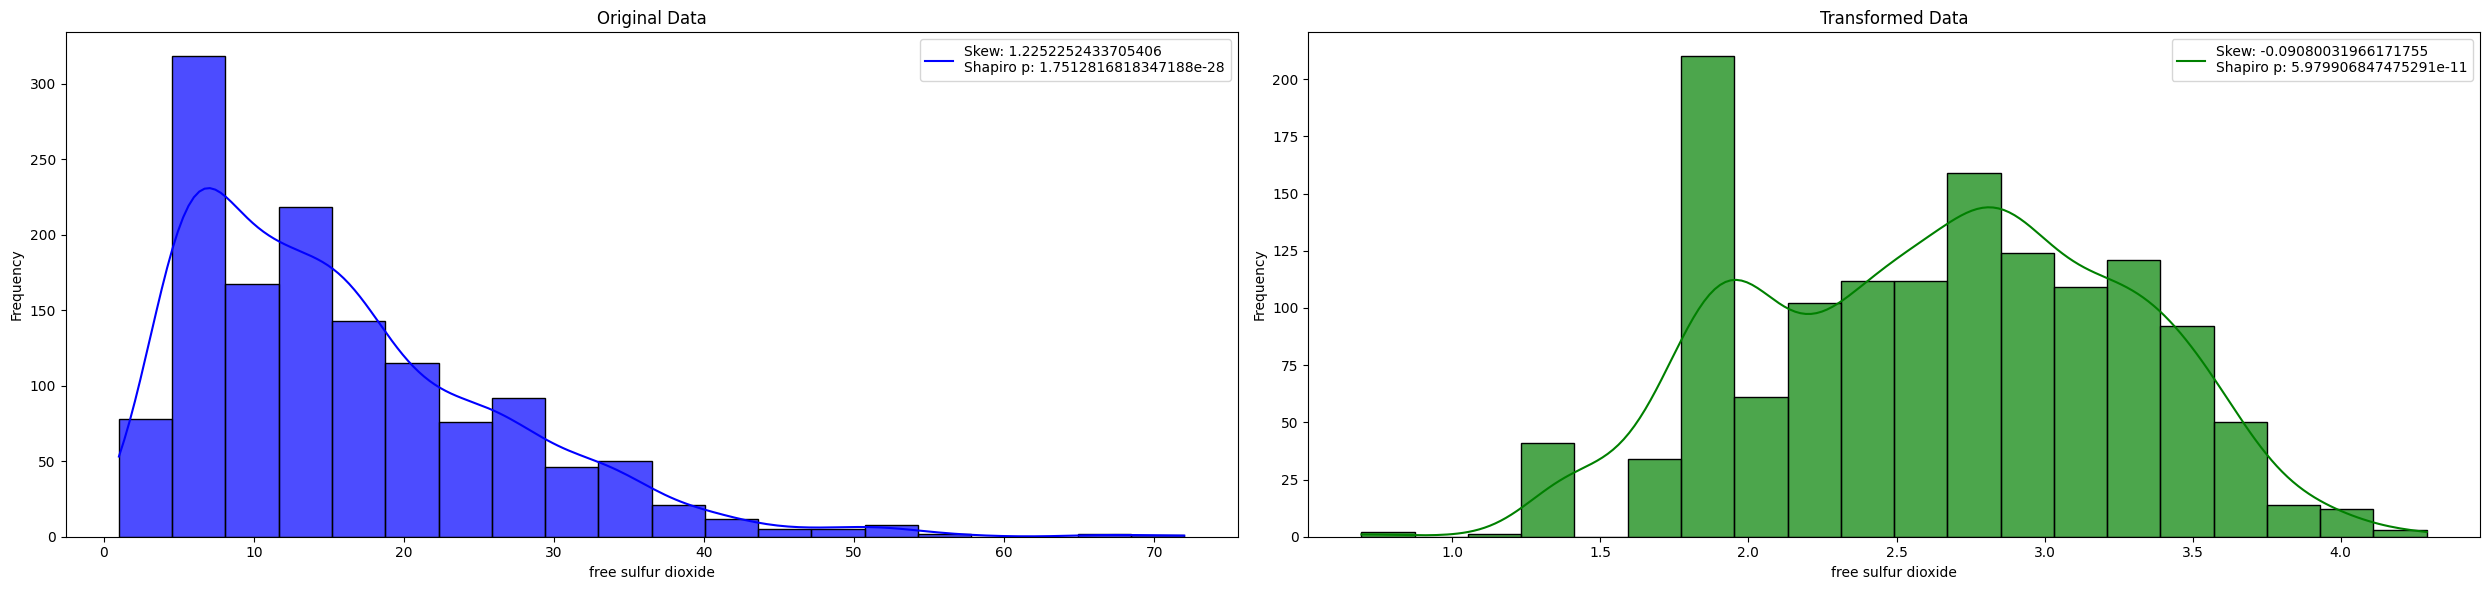

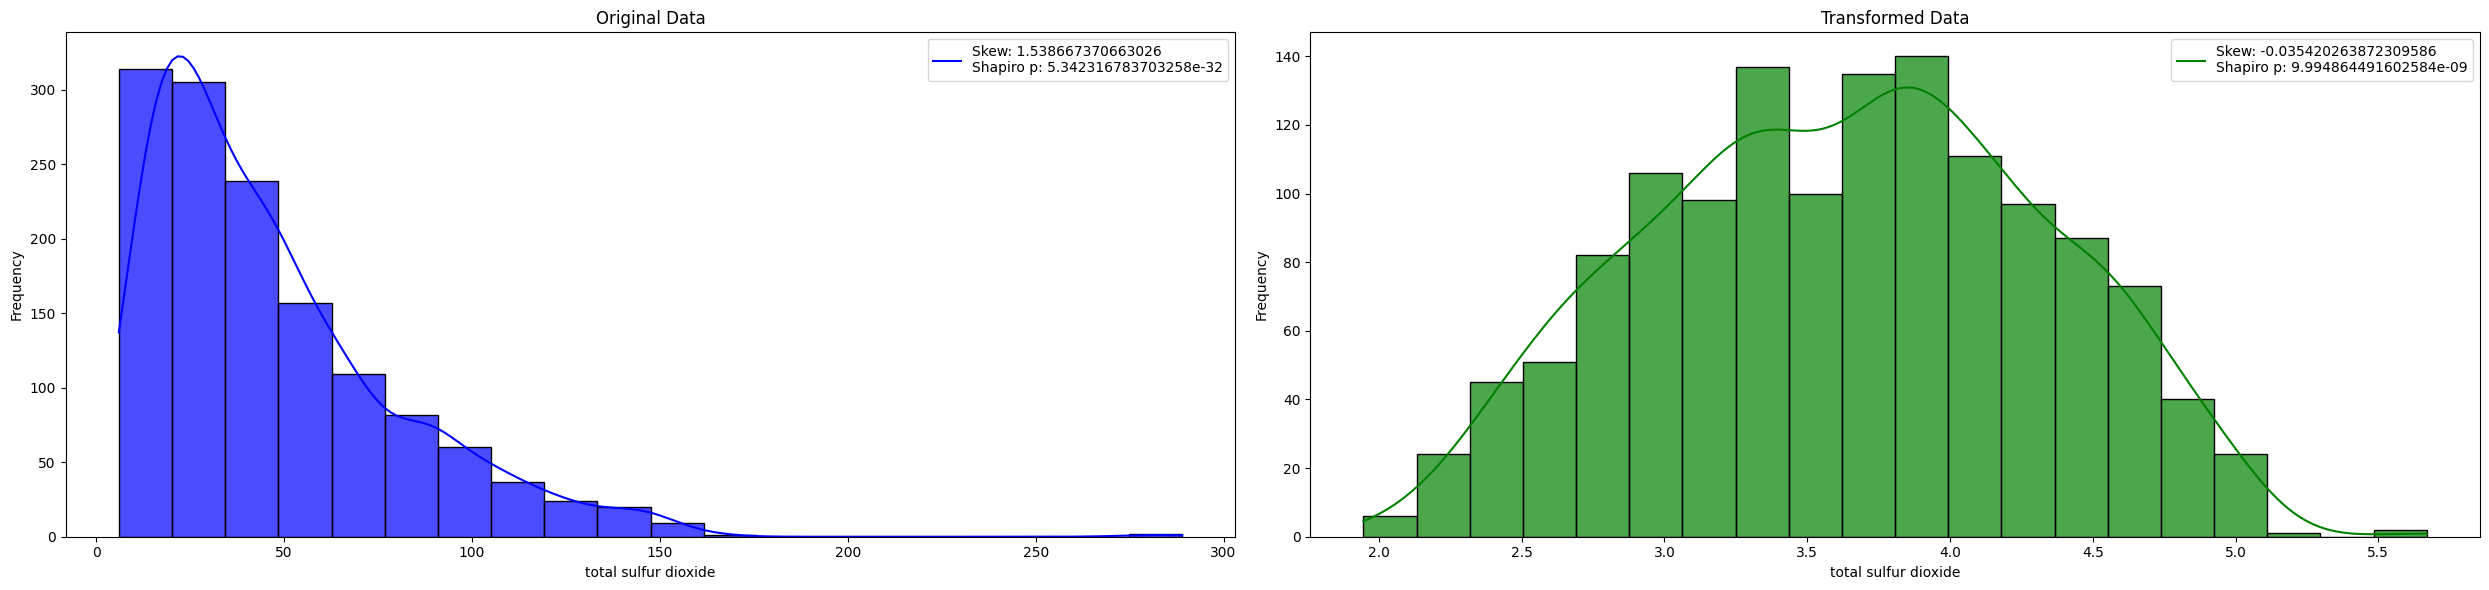

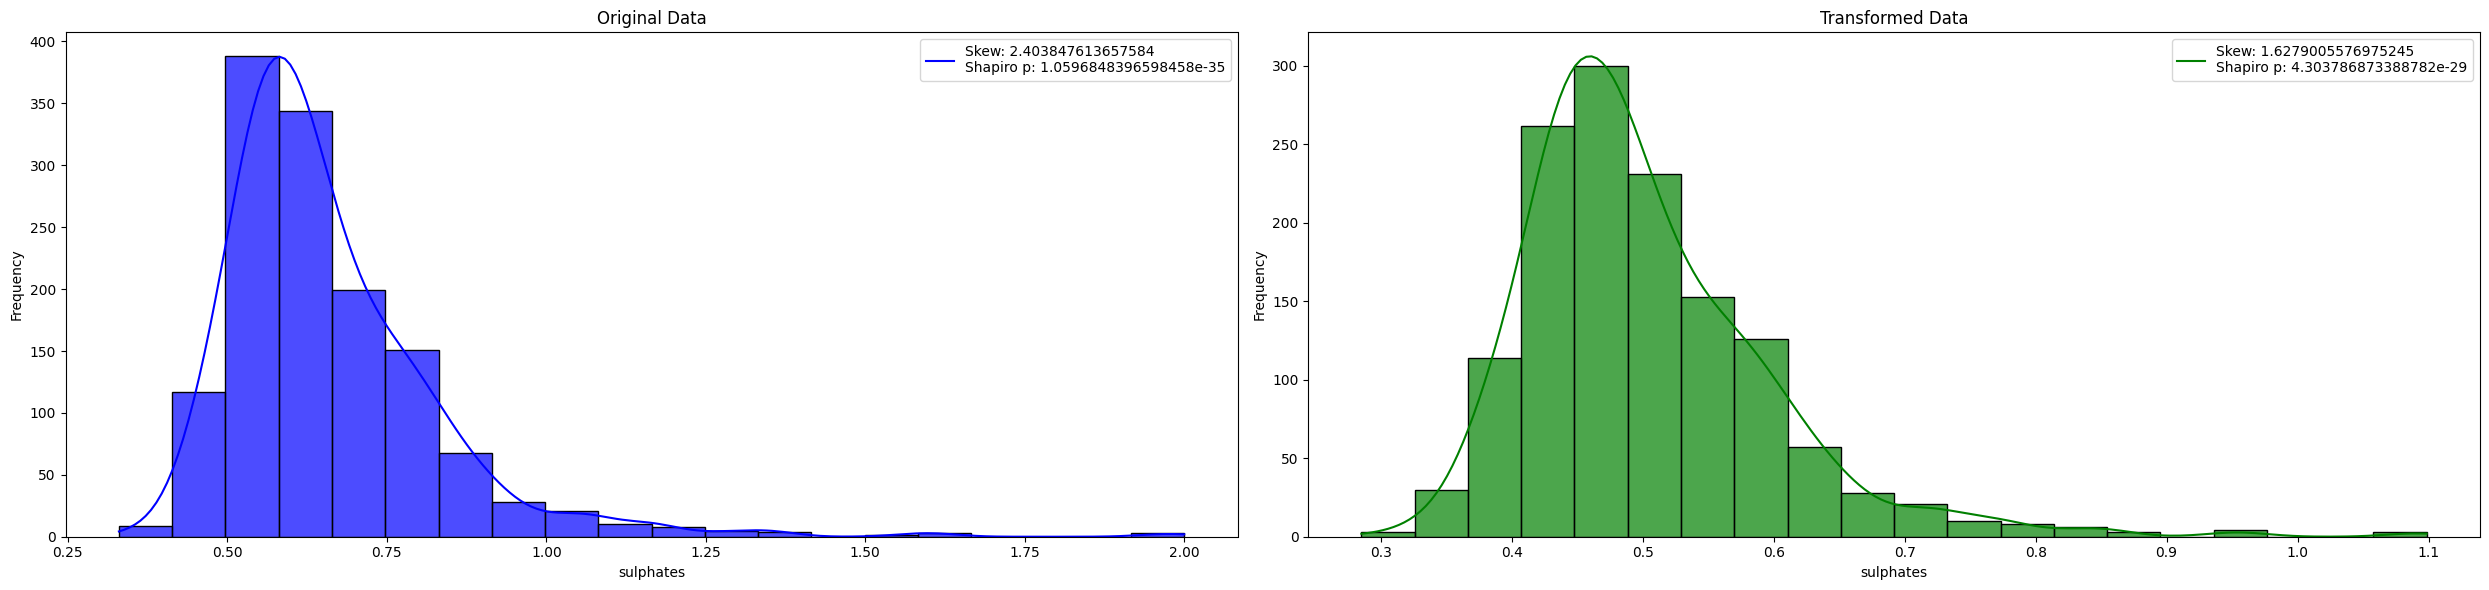

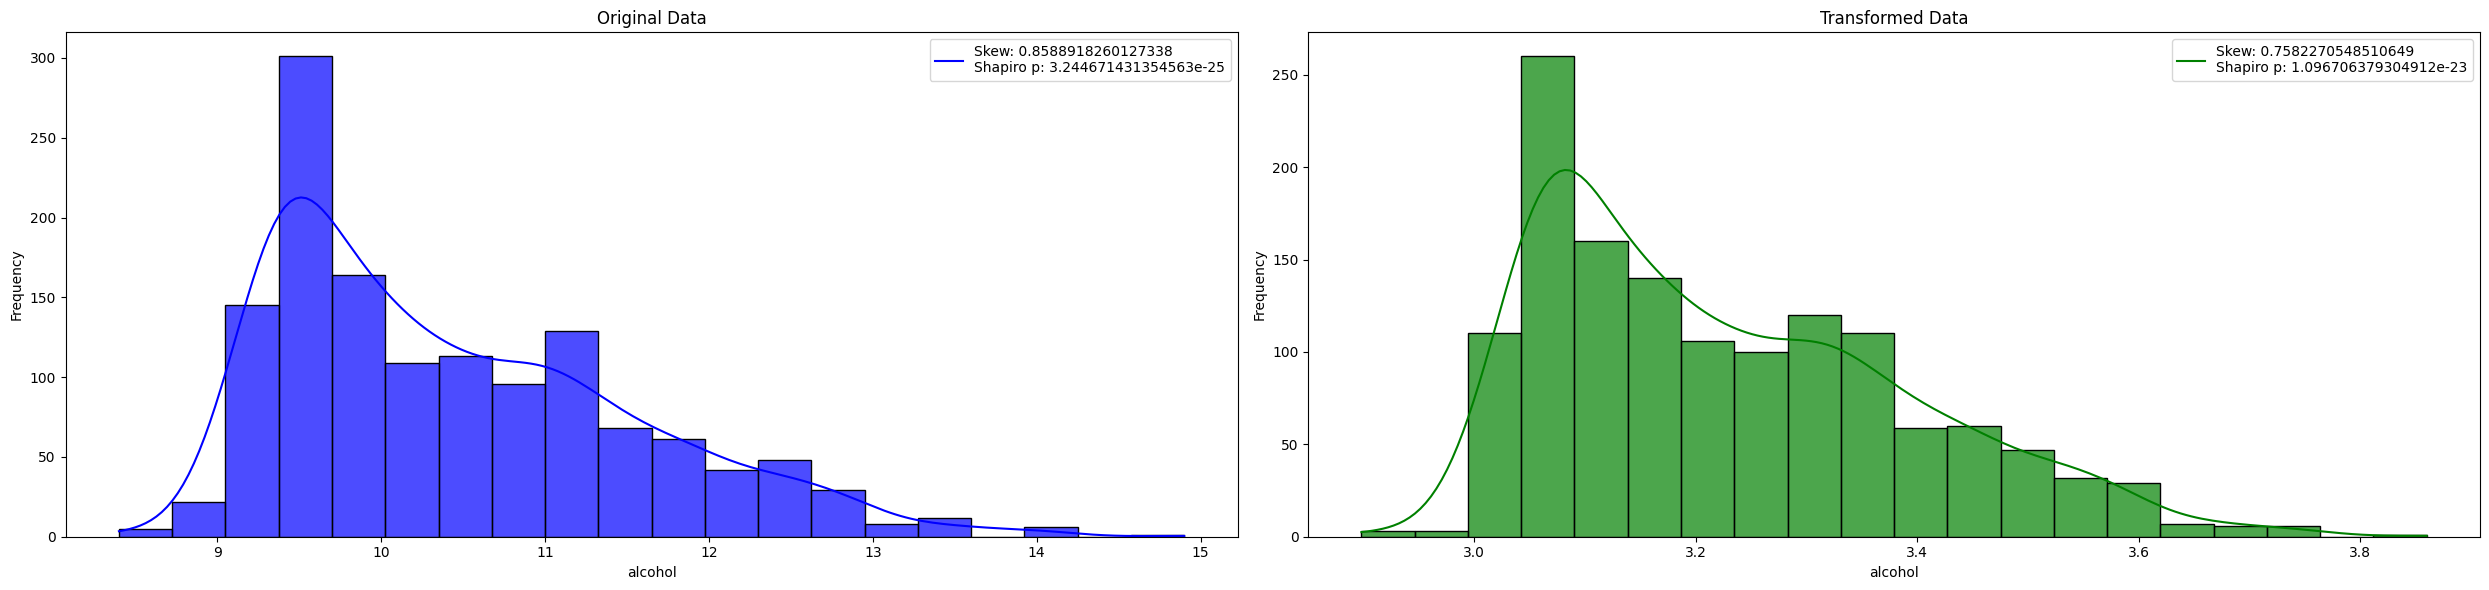

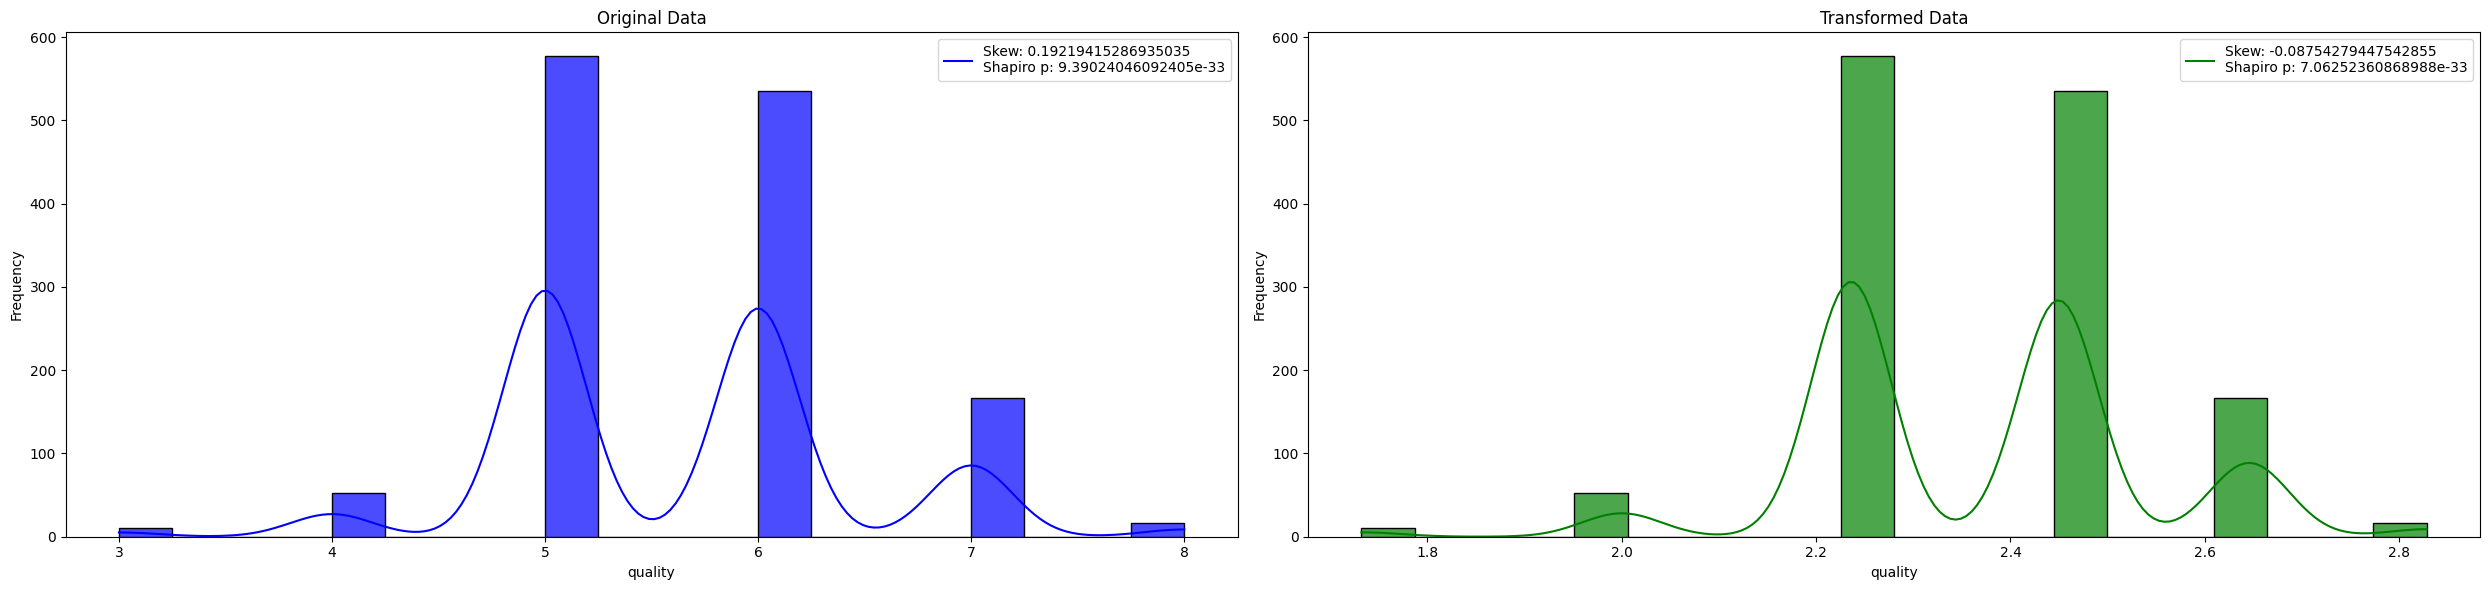

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, shapiro
from scipy.special import boxcox1p

# Define the columns to transform
columns_to_transform = Transformation_columns_list

# Initialize a DataFrame to store transformed data
transformed_df = RED_WINE_Dataset.copy()

# Apply transformations
for column in columns_to_transform:
    # Check skewness before transformation
    initial_skewness = skew(RED_WINE_Dataset[column])
    
    # Apply transformations based on skewness
    if initial_skewness > 1:
        # Apply a logarithmic transformation
        transformed_df[column] = np.log1p(RED_WINE_Dataset[column])
    elif initial_skewness < -1:
        # Apply a Box-Cox transformation (assuming data is positive)
        transformed_df[column] = boxcox1p(RED_WINE_Dataset[column], 0.15)  # You can adjust the lambda parameter
    else:
        # Apply a square root transformation
        transformed_df[column] = np.sqrt(RED_WINE_Dataset[column])

    # Check skewness after transformation
    transformed_skewness = skew(transformed_df[column])
    
    # Perform the Shapiro-Wilk test for normality
    _, p_value_original = shapiro(RED_WINE_Dataset[column])
    _, p_value_transformed = shapiro(transformed_df[column])
    
    
    # Create histograms for visual inspection
    plt.figure(figsize=(25, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(RED_WINE_Dataset[column], bins=20, color='blue', alpha=0.7,kde=True)
    plt.title('Original Data')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend([f"Skew: {initial_skewness}\nShapiro p: {p_value_original}"])
    
    plt.subplot(1, 2, 2)
    sns.histplot(transformed_df[column], bins=20, color='green', alpha=0.7,kde=True)
    plt.title('Transformed Data')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend([f"Skew: {transformed_skewness}\nShapiro p: {p_value_transformed}"])
    
    plt.tight_layout()
    plt.show()


    ########################################################################################################################

#### **`Q.N0-06`       Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of features. What is the minimum number of principal components required to explain 90% of the variance in the data?**

#### **Ans :-**

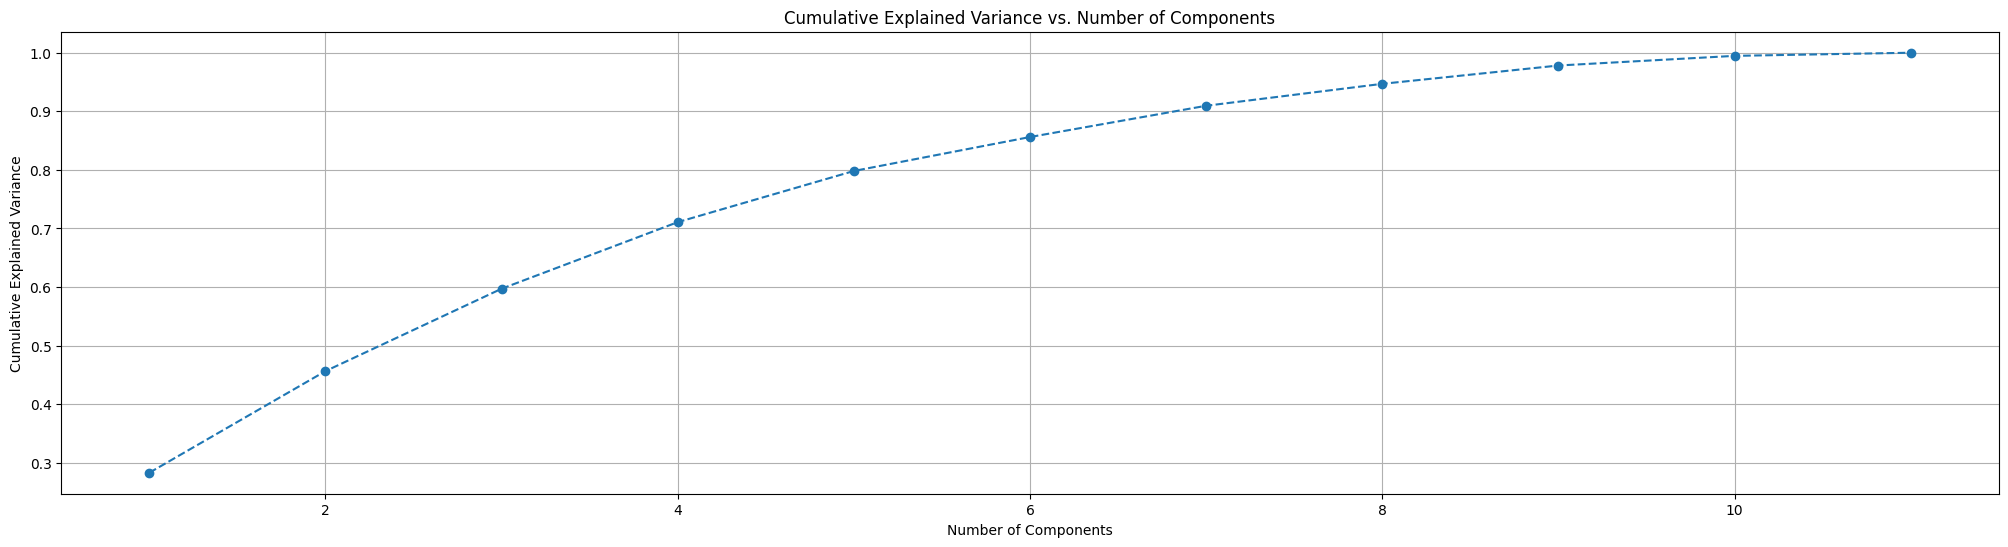

Number of components required to explain 90% of the variance: 7


In [73]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Separate features (X) and labels (y) if applicable
X = RED_WINE_Dataset.drop('quality', axis=1)

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_std)

# Calculate the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Find the number of components required to explain 90% of the variance
num_components_90_percent = np.argmax(cumulative_variance_ratio >= 0.90) + 1

# Plot explained variance vs. number of components
plt.figure(figsize=(25,6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

print(f"Number of components required to explain 90% of the variance: {num_components_90_percent}")


                                        END